# Objective - 
Using public data from 33 FitBit users, this study will investigate trends in smart wellness device usage and use these trends to better serve Bellabeat customers.

Stakeholder and Business Task: Bellabeat's Chief Creative Officer, Urška Sršen, has requested an data analysis of wearable wellness technology similar to that produced by Bellabeat to help improve the Bellabeat marketing strategy

Data source - 

https://www.kaggle.com/code/cassieskipper/google-data-analytics-capstone-fitbit-bellabeat/data

Prepare - 
Data Storage and Organization: A zipped data file containing information for 33 FitBit users was downloaded from Kaggle. These data were collected from FitBit users via an Amazon Mechanical Turk survey from March 12 - May 12, 2016.

The data files were stored on a local computer hard drive and in a Google Drive folder. This project will focus on two files obtained from the zipped file folder:

dailyActivity_merged.csv

sleepDay_merged.csv

# Step 1 - processing the data

In [1]:
#import libraries
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import os
import statsmodels

In [2]:
dailyActivity = pd.read_csv("dailyActivity_merged.csv")
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
dailyActivity.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [4]:
dailySleep = pd.read_csv("sleepDay_merged.csv")
dailySleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
dailySleep.tail()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545
412,8792009665,5/4/2016 12:00:00 AM,1,439,463


# EDA

In [6]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [8]:
dailyActivity.Id.nunique()

33

In [9]:
dailySleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
dailySleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [11]:
dailySleep.Id.nunique()

24

In [12]:
#rename activityDate column
dailyActivity.rename(columns = {"ActivityDate": "Date"}, inplace = True)

In [13]:
dailyActivity.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [14]:
dailyActivity.Id.unique()

array([1503960366, 1624580081, 1644430081, 1844505072, 1927972279,
       2022484408, 2026352035, 2320127002, 2347167796, 2873212765,
       3372868164, 3977333714, 4020332650, 4057192912, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6290855005, 6775888955, 6962181067,
       7007744171, 7086361926, 8053475328, 8253242879, 8378563200,
       8583815059, 8792009665, 8877689391], dtype=int64)

In [15]:
#the date column is of object datatype
#we should convert it to datetime datatype
dailyActivity.Date.unique()

array(['4/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '5/1/2016',
       '5/2/2016', '5/3/2016', '5/4/2016', '5/5/2016', '5/6/2016',
       '5/7/2016', '5/8/2016', '5/9/2016', '5/10/2016', '5/11/2016',
       '5/12/2016'], dtype=object)

In [16]:
dailyActivity["Date"] = pd.to_datetime(dailyActivity["Date"])
dailyActivity.Date.unique()

array(['2016-04-12T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000', '2016-04-15T00:00:00.000000000',
       '2016-04-16T00:00:00.000000000', '2016-04-17T00:00:00.000000000',
       '2016-04-18T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-20T00:00:00.000000000', '2016-04-21T00:00:00.000000000',
       '2016-04-22T00:00:00.000000000', '2016-04-23T00:00:00.000000000',
       '2016-04-24T00:00:00.000000000', '2016-04-25T00:00:00.000000000',
       '2016-04-26T00:00:00.000000000', '2016-04-27T00:00:00.000000000',
       '2016-04-28T00:00:00.000000000', '2016-04-29T00:00:00.000000000',
       '2016-04-30T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-04T00:00:00.000000000', '2016-05-05T00:00:00.000000000',
       '2016-05-06T00:00:00.000000000', '2016-05-07T00:00:00.000000000',
       '2016-05-08T00:00:00.000000000', '2016-05-09

In [17]:
dailySleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [18]:
dailySleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [19]:
dailySleep.rename(columns = {"SleepDay": "Date"}, inplace = True)
dailySleep.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [20]:
dailySleep["Date"] = pd.to_datetime(dailySleep["Date"])
dailySleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   Date                413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [21]:
dailySleep.Date.unique()

array(['2016-04-12T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-15T00:00:00.000000000', '2016-04-16T00:00:00.000000000',
       '2016-04-17T00:00:00.000000000', '2016-04-19T00:00:00.000000000',
       '2016-04-20T00:00:00.000000000', '2016-04-21T00:00:00.000000000',
       '2016-04-23T00:00:00.000000000', '2016-04-24T00:00:00.000000000',
       '2016-04-25T00:00:00.000000000', '2016-04-26T00:00:00.000000000',
       '2016-04-28T00:00:00.000000000', '2016-04-29T00:00:00.000000000',
       '2016-04-30T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-05T00:00:00.000000000', '2016-05-06T00:00:00.000000000',
       '2016-05-07T00:00:00.000000000', '2016-05-08T00:00:00.000000000',
       '2016-05-09T00:00:00.000000000', '2016-05-10T00:00:00.000000000',
       '2016-05-11T00:00:00.000000000', '2016-04-14T00:00:00.000000000',
       '2016-04-22T00:00:00.000000000', '2016-04-27

In [22]:
#merge dailyActivity and dailySleep dataframes
daily_merged = pd.merge(dailyActivity, dailySleep, on = ["Id", "Date"])

In [23]:
daily_merged.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712


In [24]:
daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        413 non-null    int64         
 1   Date                      413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [25]:
daily_merged.Id.unique()

array([1503960366, 1644430081, 1844505072, 1927972279, 2026352035,
       2320127002, 2347167796, 3977333714, 4020332650, 4319703577,
       4388161847, 4445114986, 4558609924, 4702921684, 5553957443,
       5577150313, 6117666160, 6775888955, 6962181067, 7007744171,
       7086361926, 8053475328, 8378563200, 8792009665], dtype=int64)

In [26]:
daily_merged.Id.nunique()

24

In [27]:
#check for duplicates
daily_merged.drop_duplicates(inplace = True)
daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

In [28]:
daily_merged["Day"] = (daily_merged["Date"]).astype('datetime64').dt.day_name()

In [29]:
daily_merged["Month"] = (daily_merged["Date"]).astype('datetime64').dt.month_name()

In [30]:
daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

In [31]:
daily_merged.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,Month
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tuesday,April
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,Wednesday,April
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,Friday,April
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,Saturday,April
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,Sunday,April


In [32]:
daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

# EDA with Sweetviz

In [33]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [34]:
import sweetviz as sv

In [35]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
advert_report = sv.analyze(daily_merged)

                                             |                                             | [  0%]   00:00 ->…

In [37]:
advert_report.show_html('daily_merged.html', open_browser=True)

Report daily_merged.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [38]:
import IPython


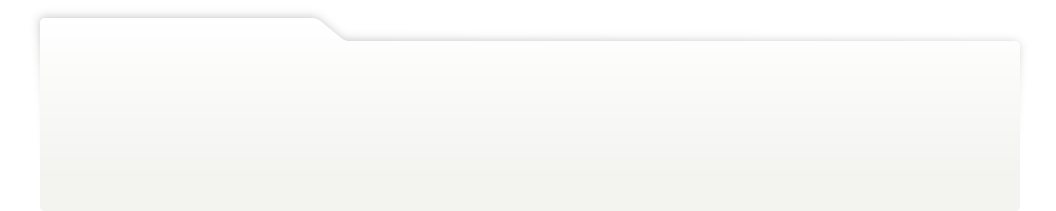
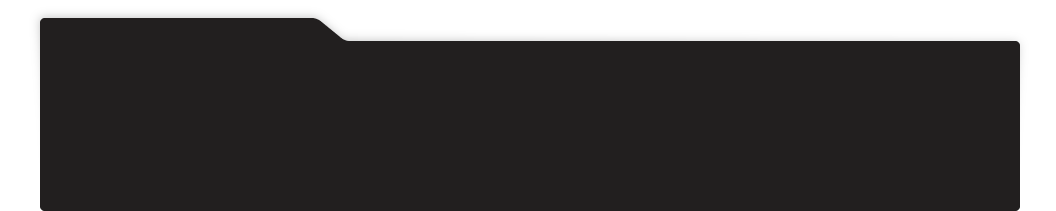
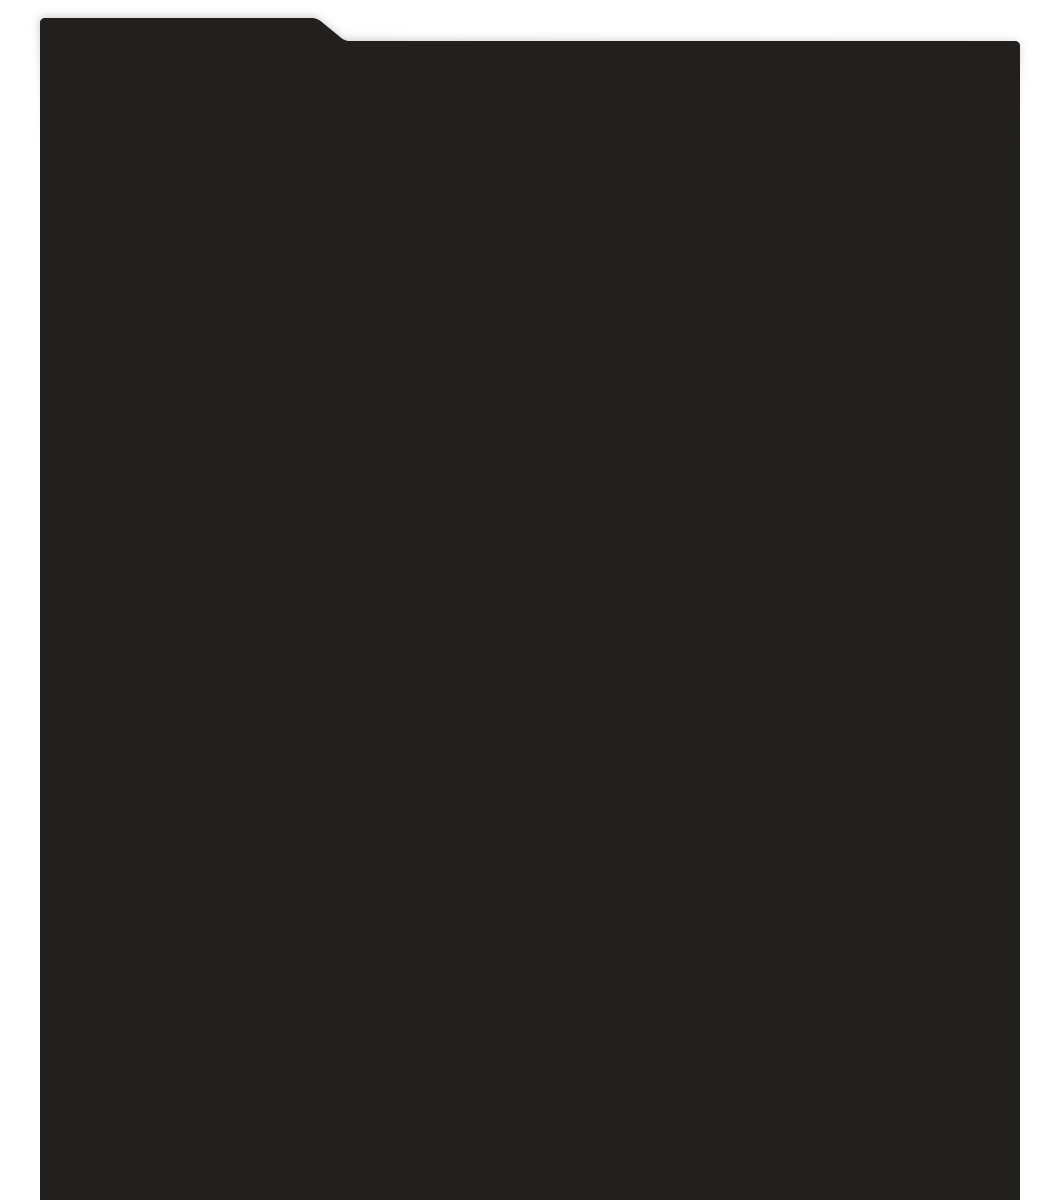
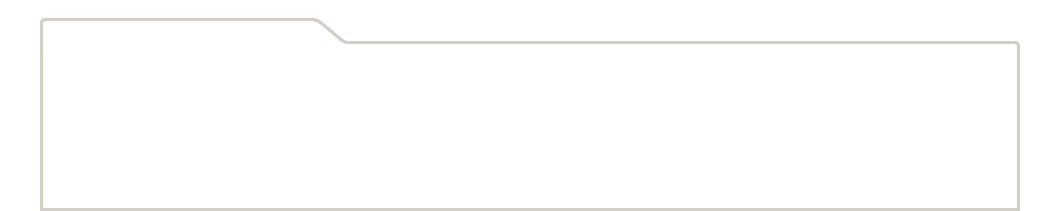
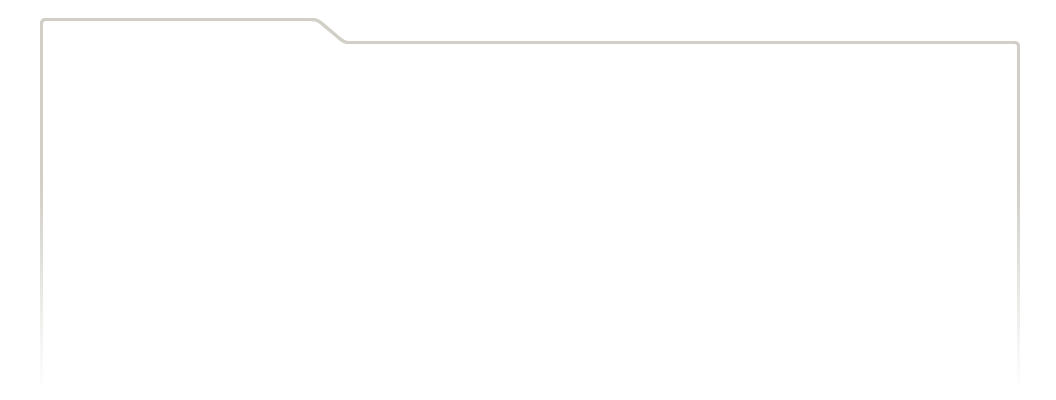
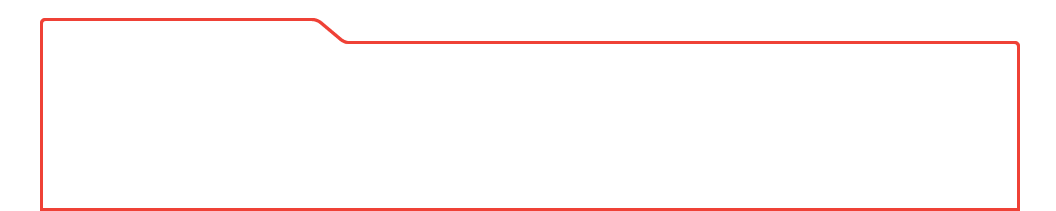
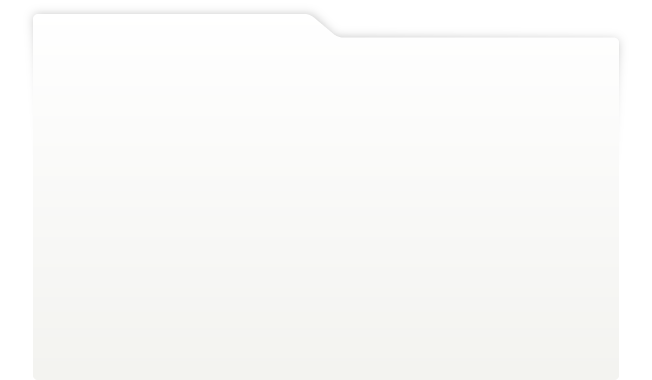
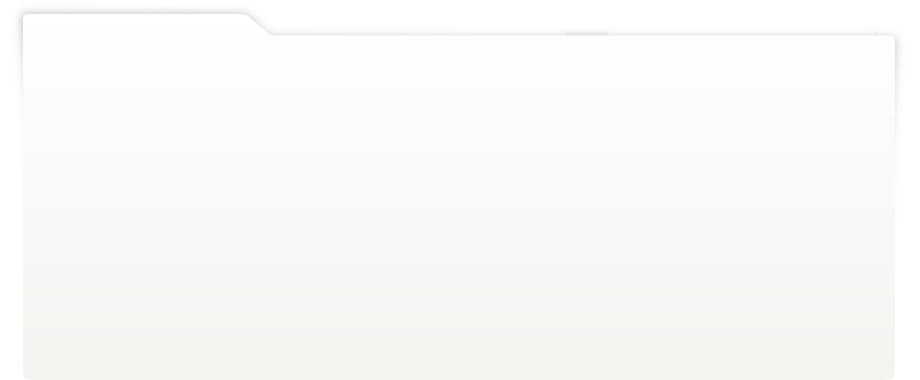
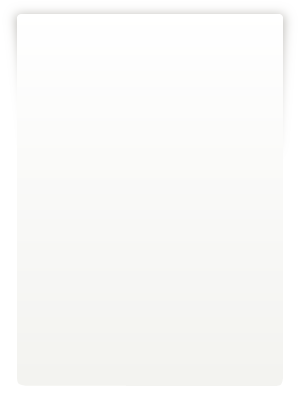
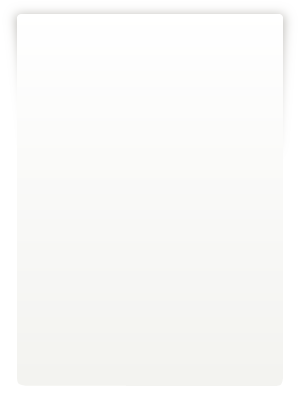
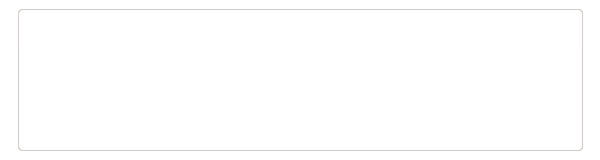
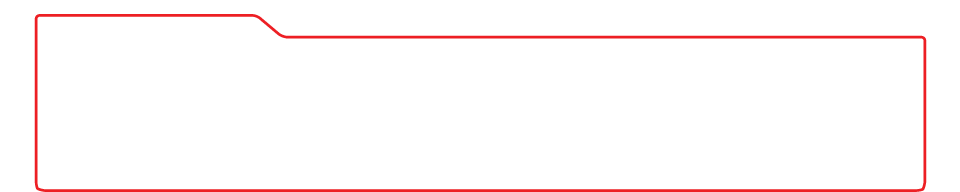
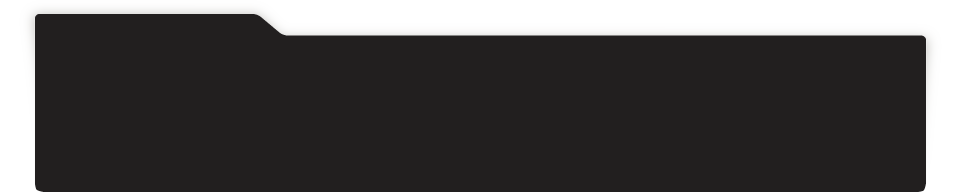
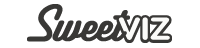
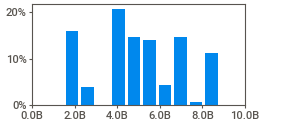
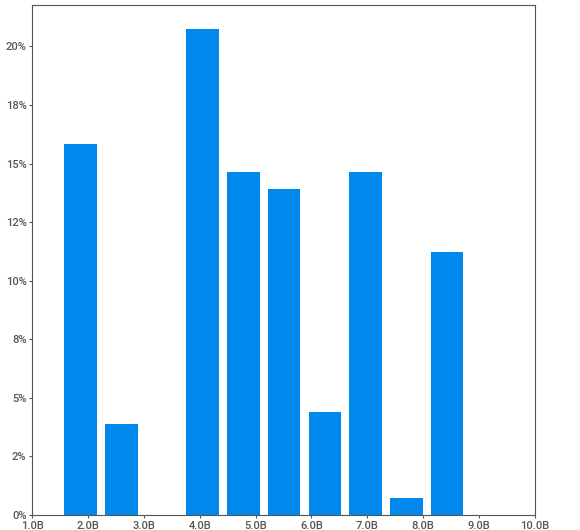
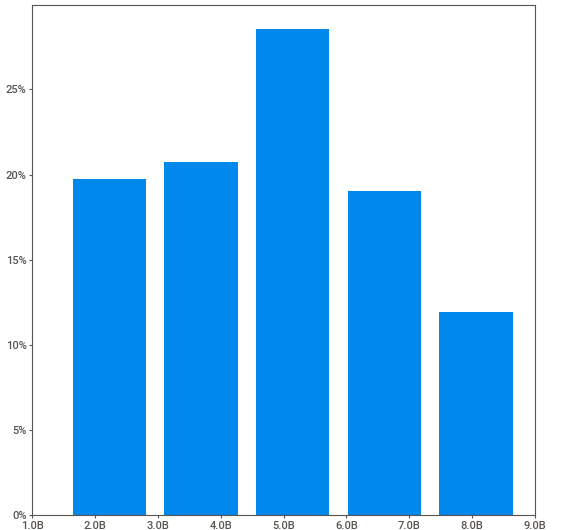
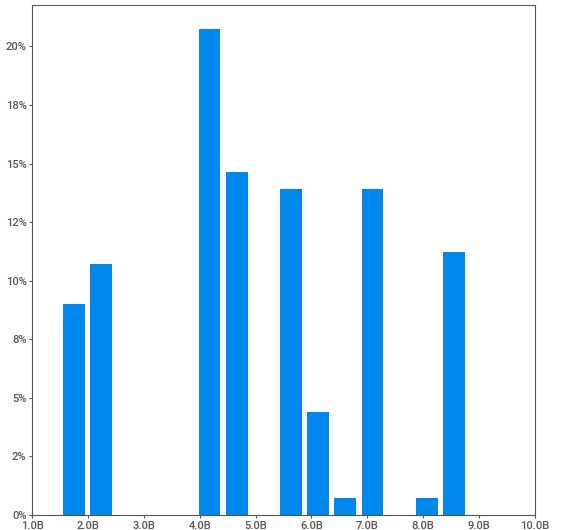
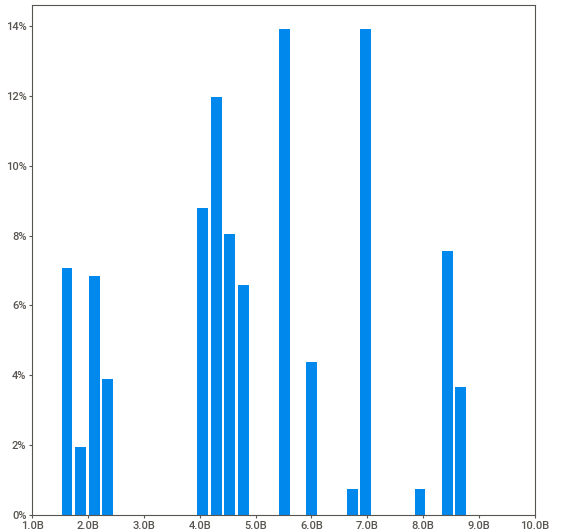
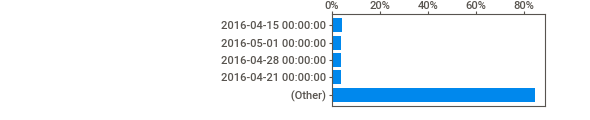
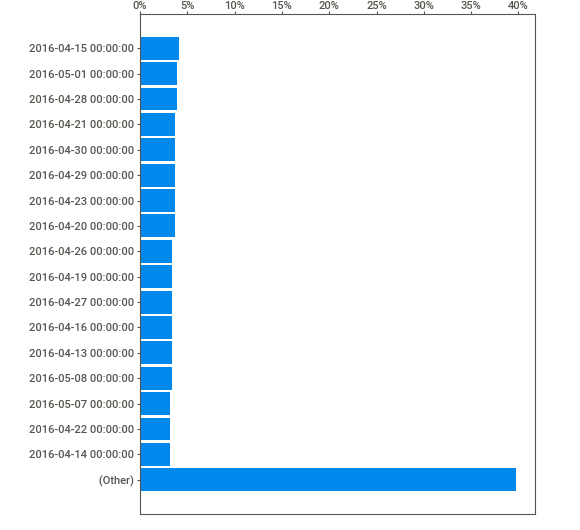
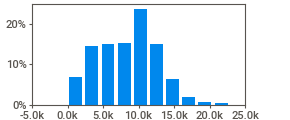
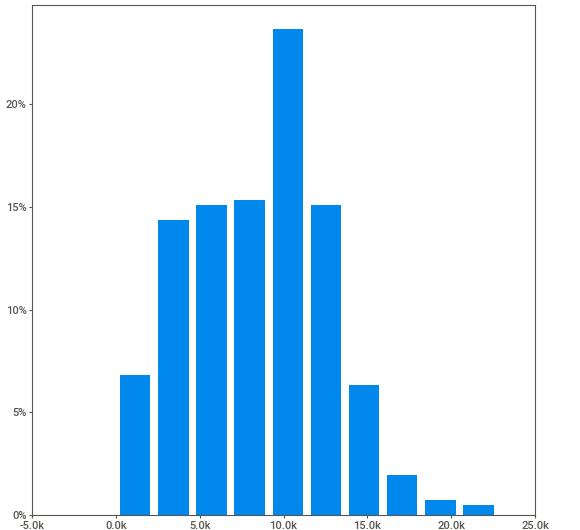
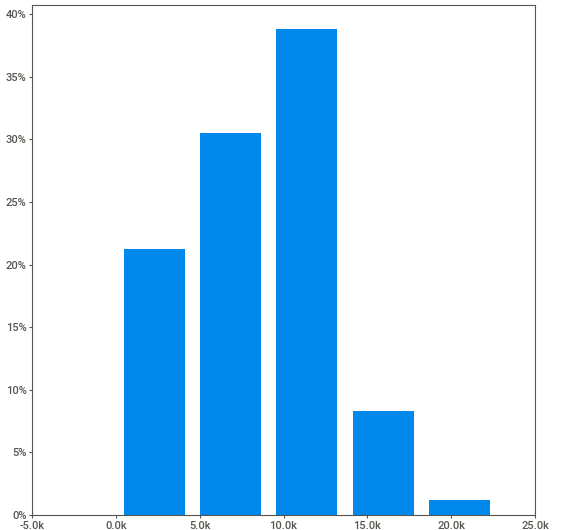
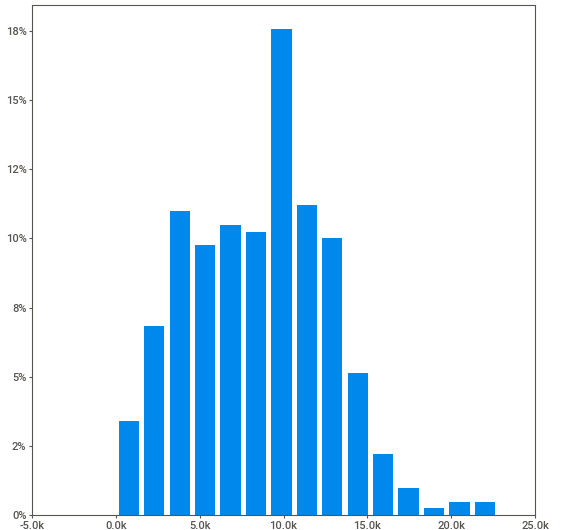
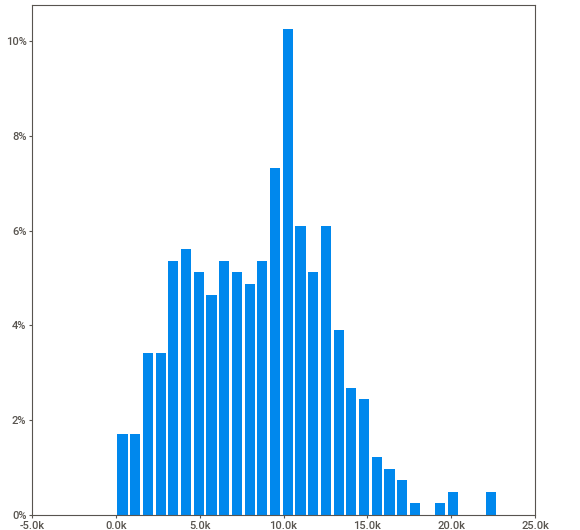
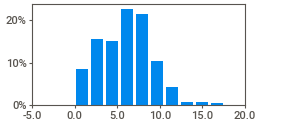
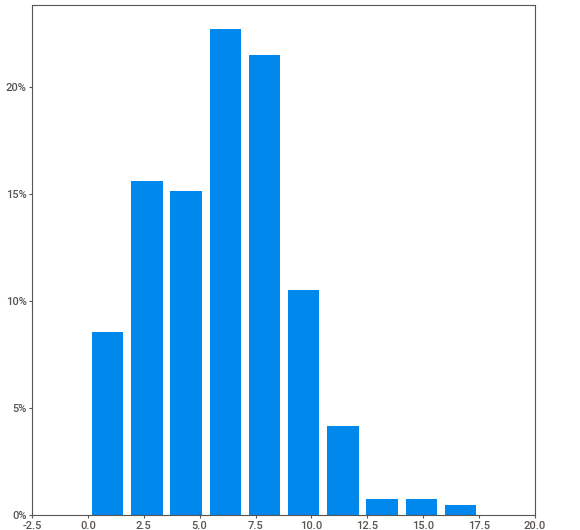
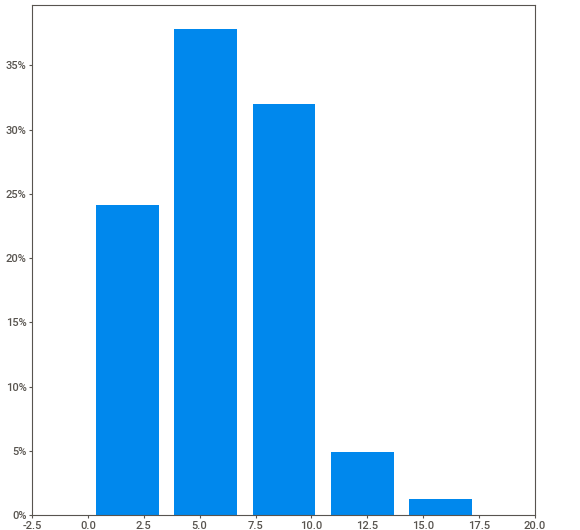
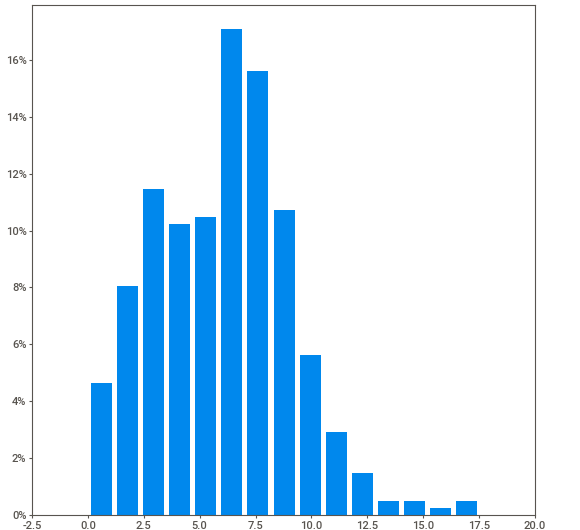
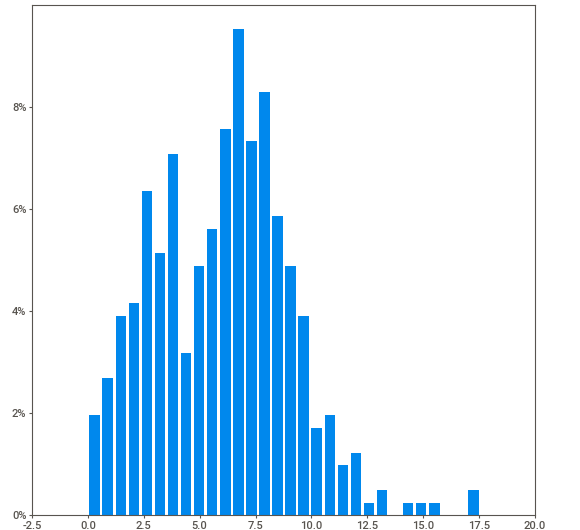
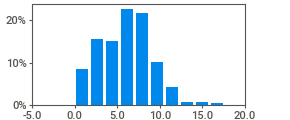
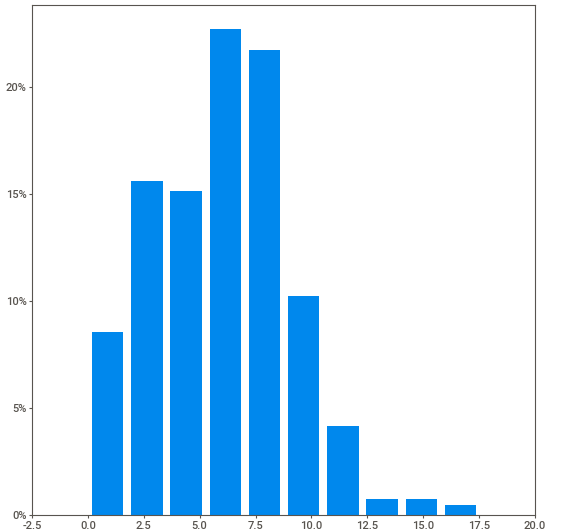
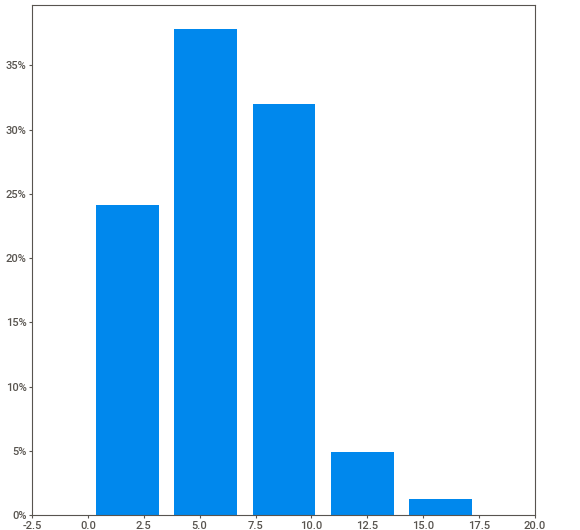
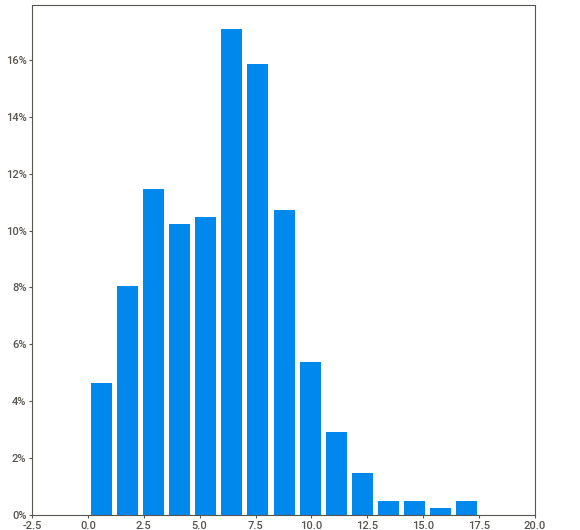
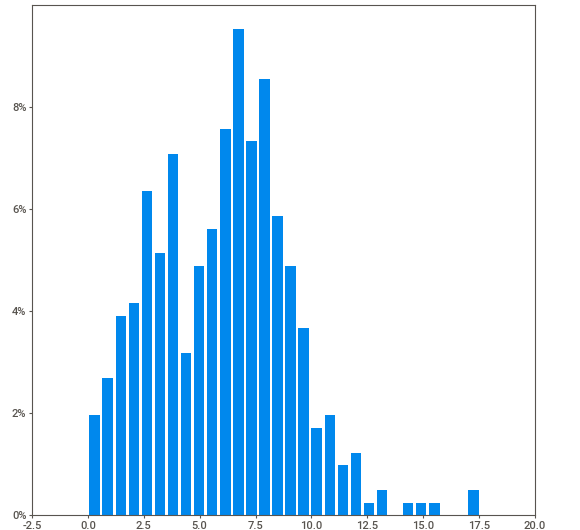
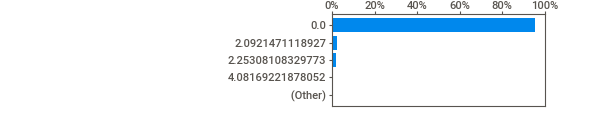
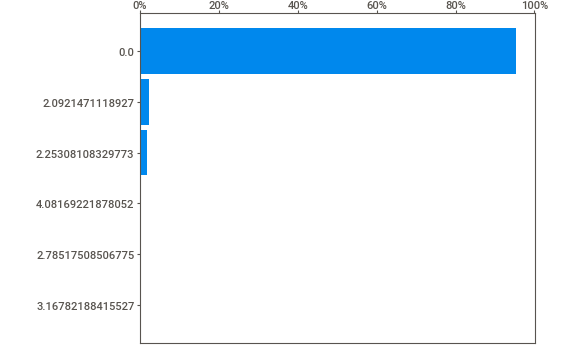
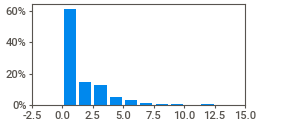
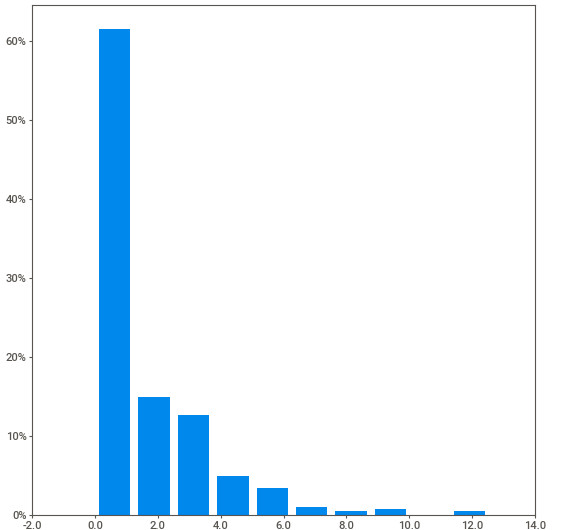
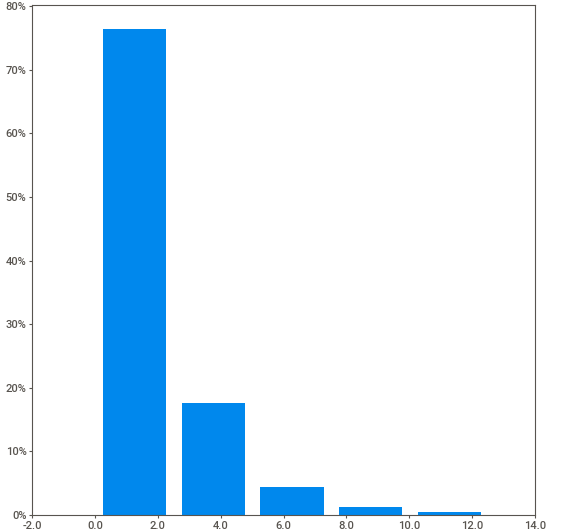
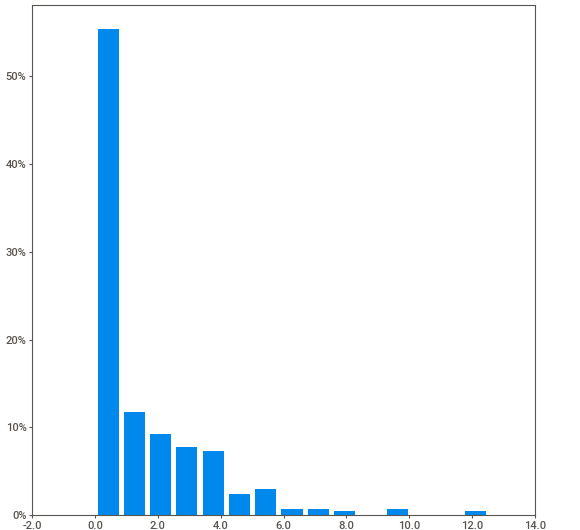
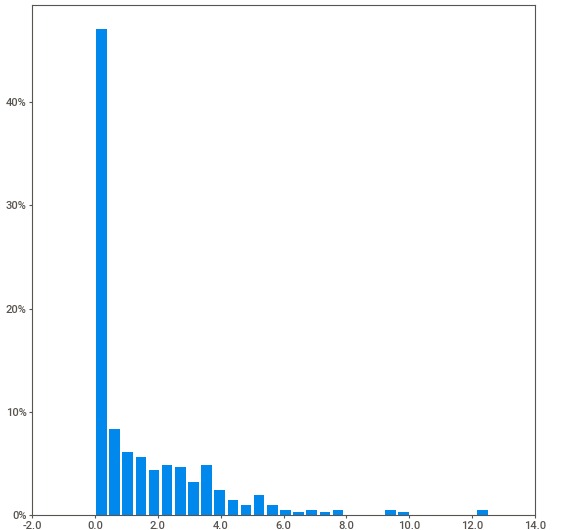
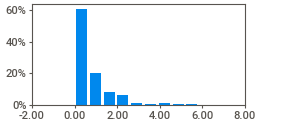
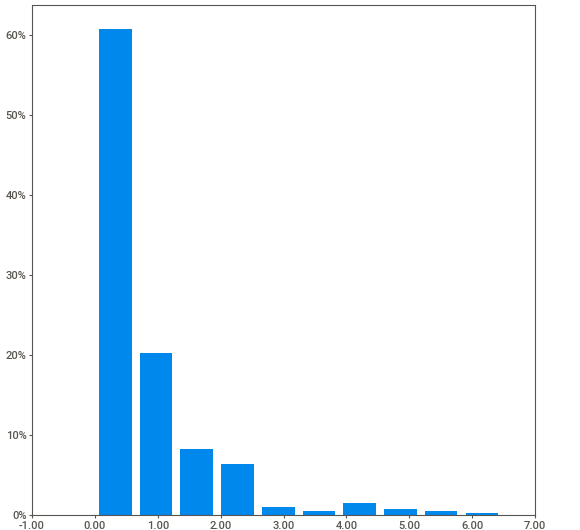
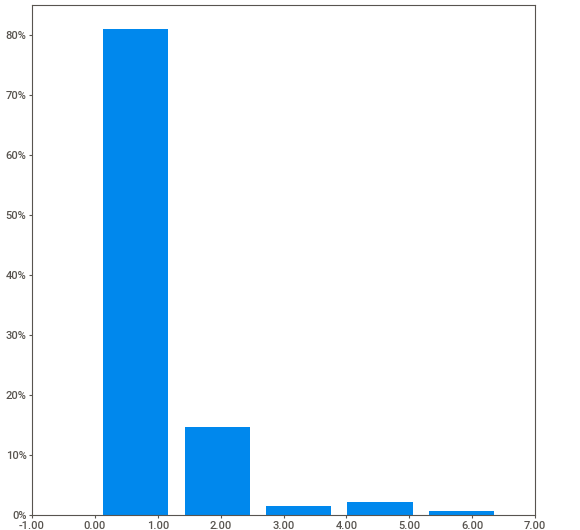
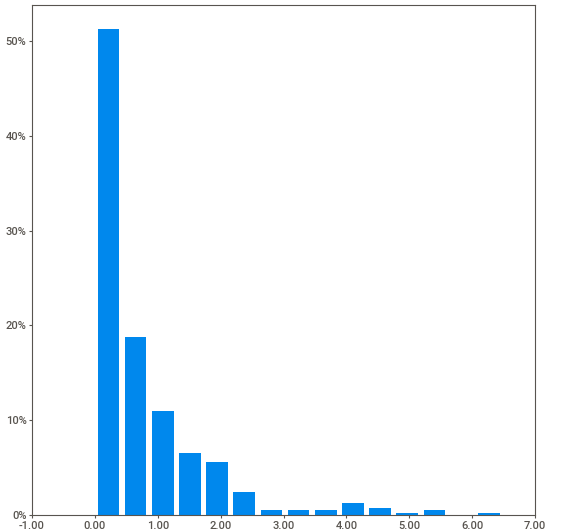
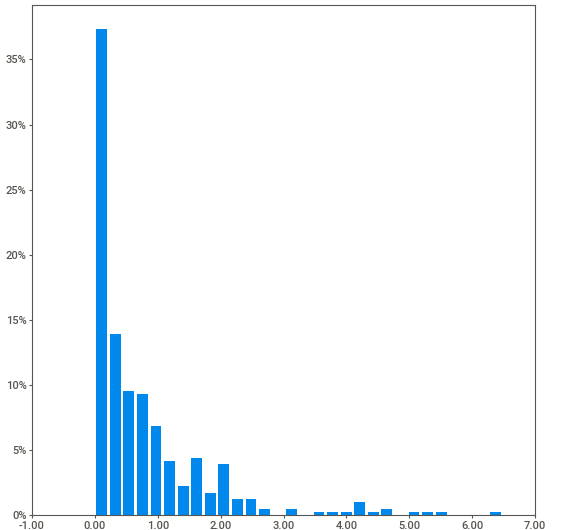
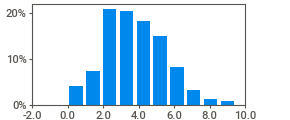
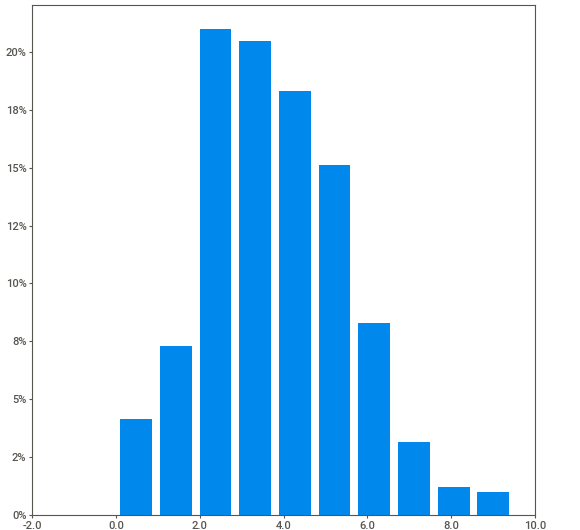
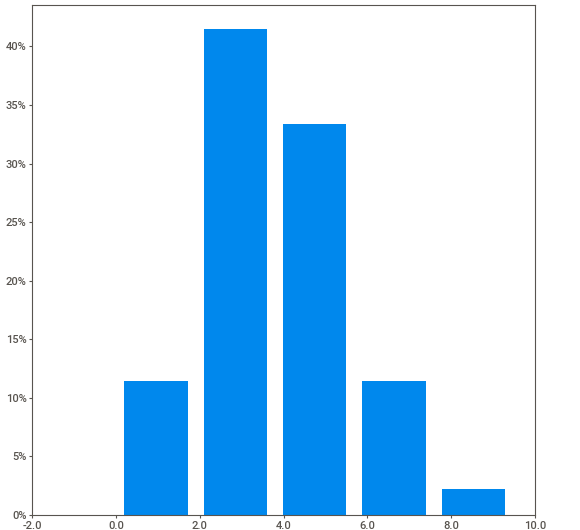
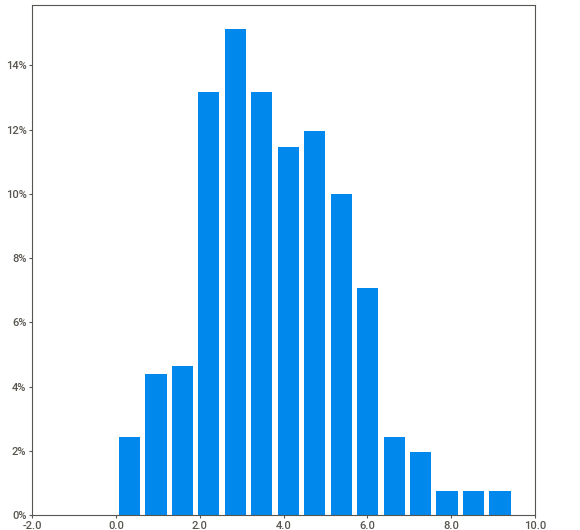
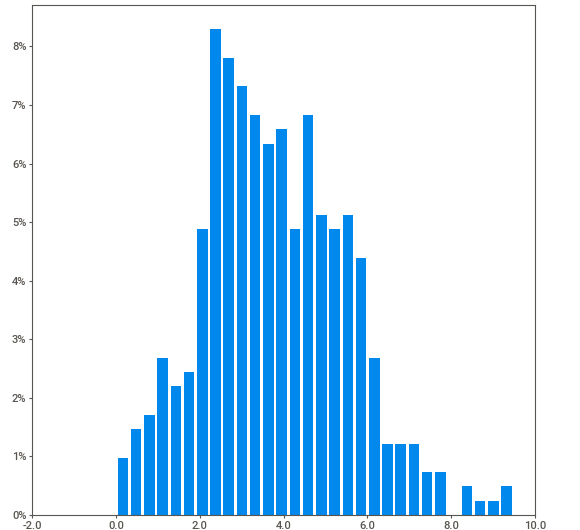
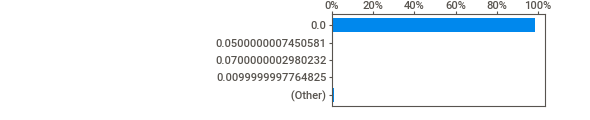
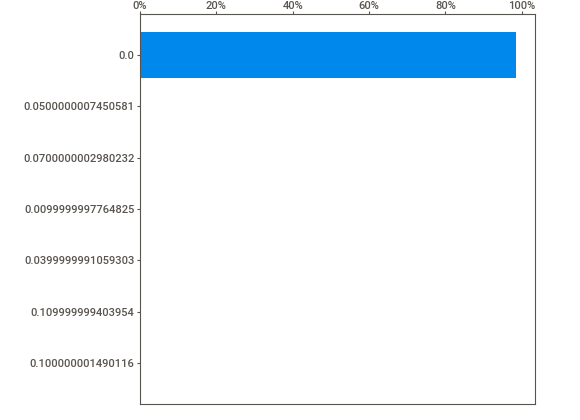
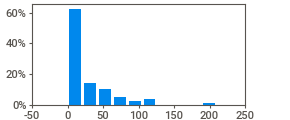
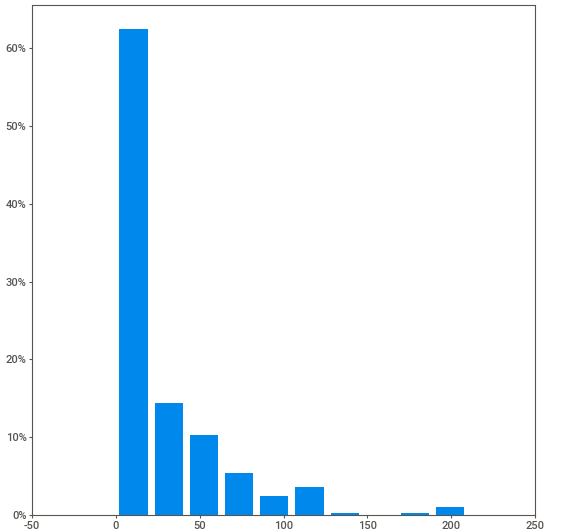
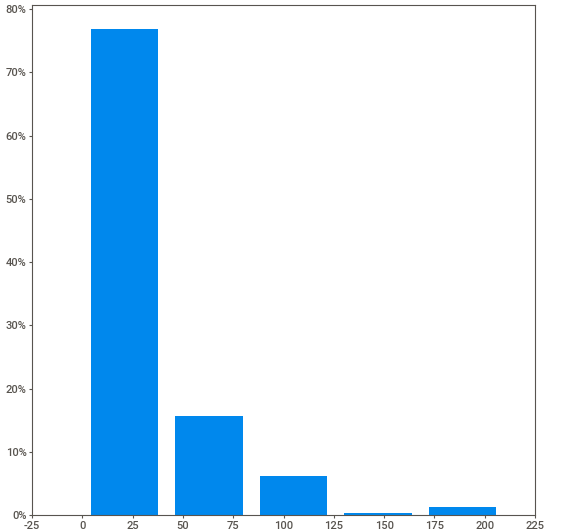
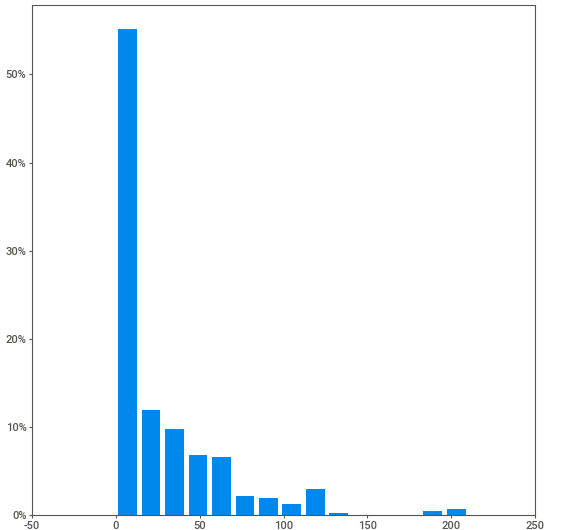
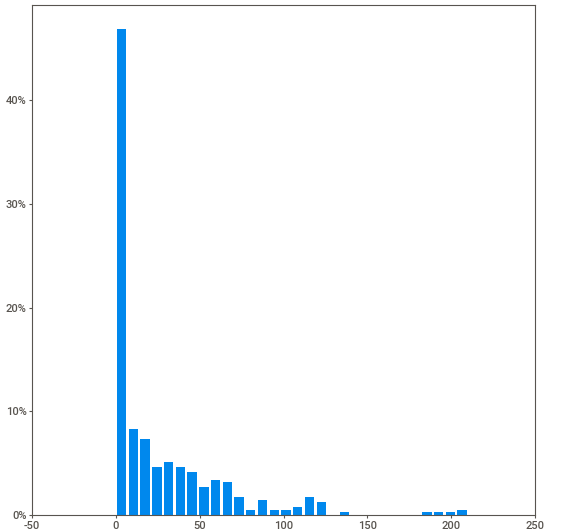
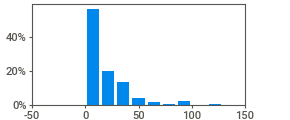
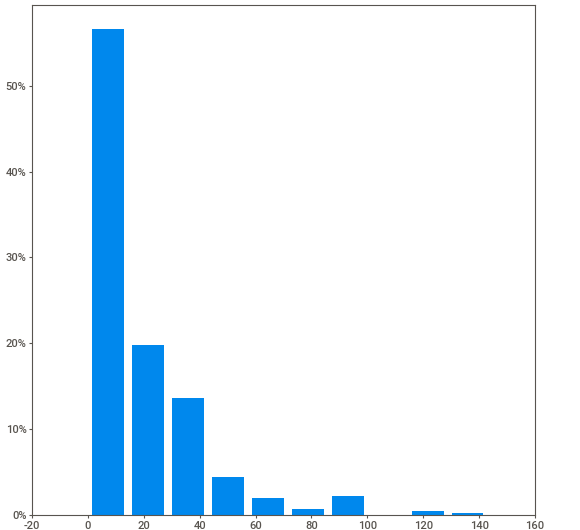
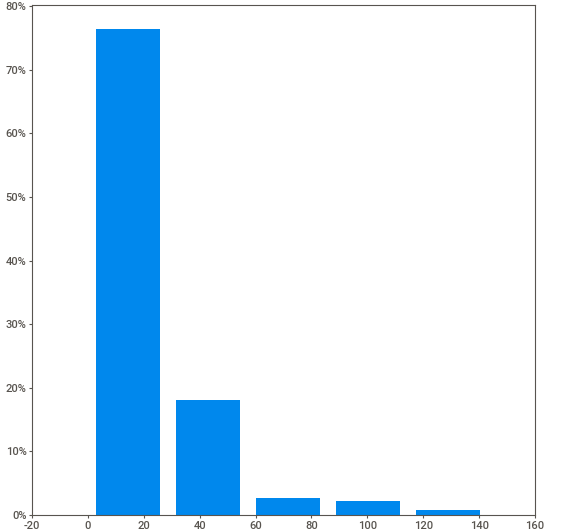
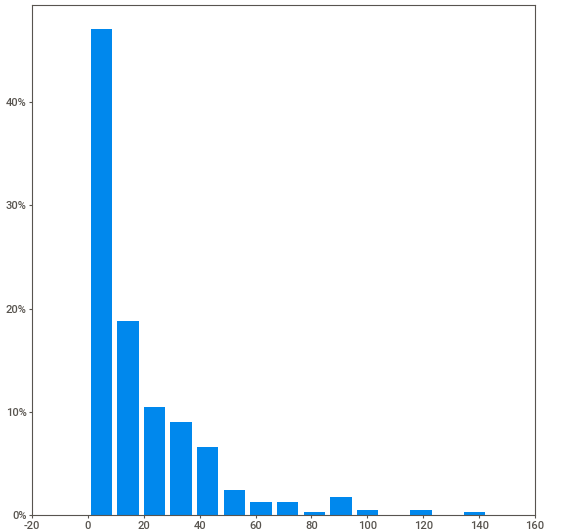
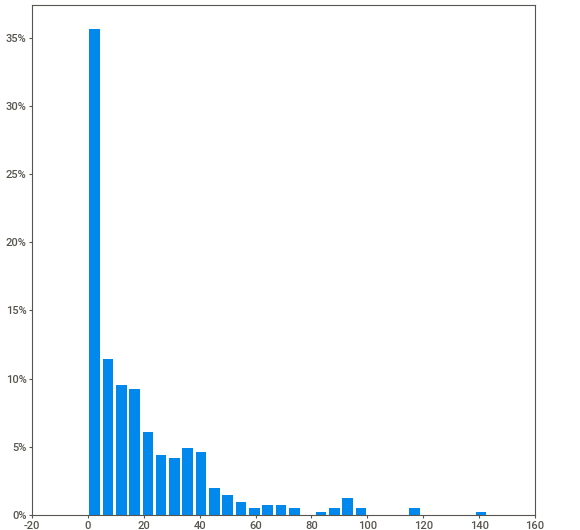
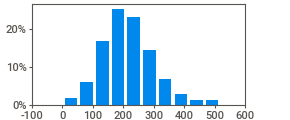
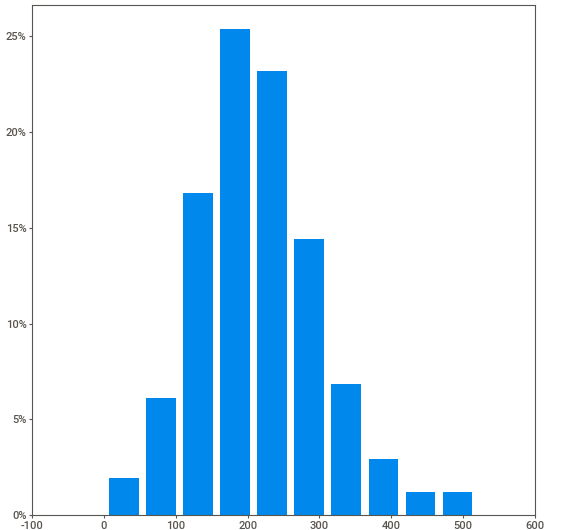
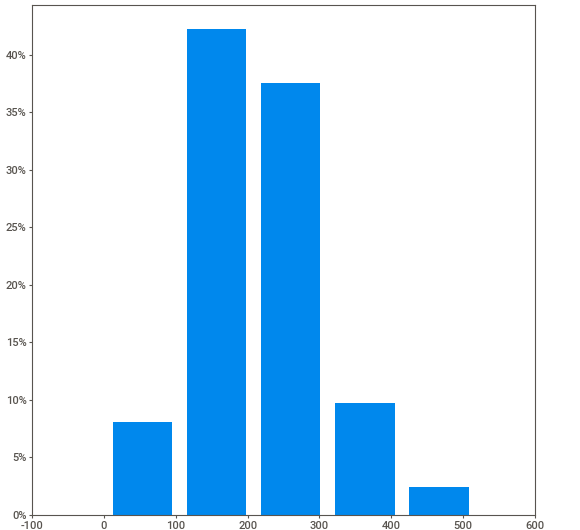
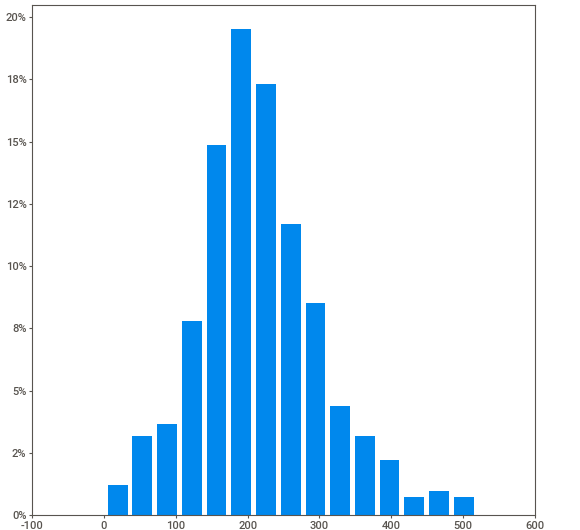
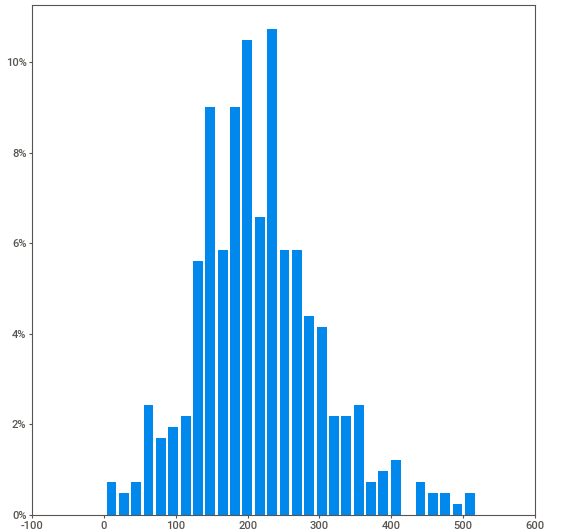
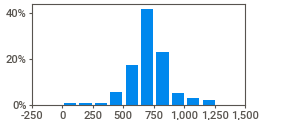
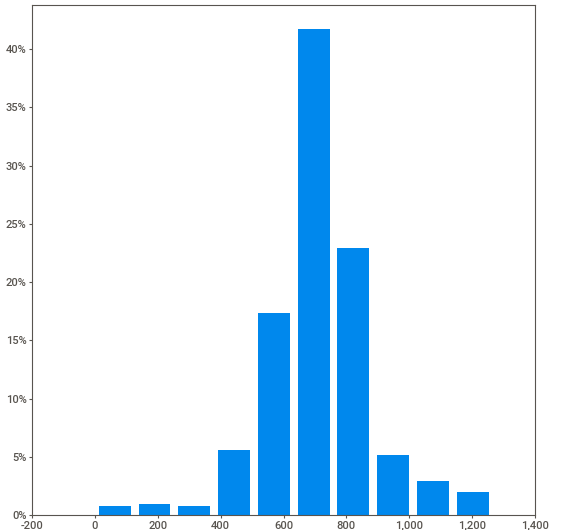
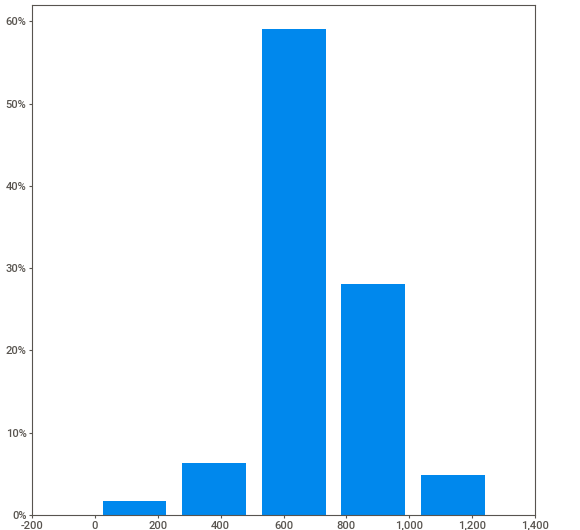
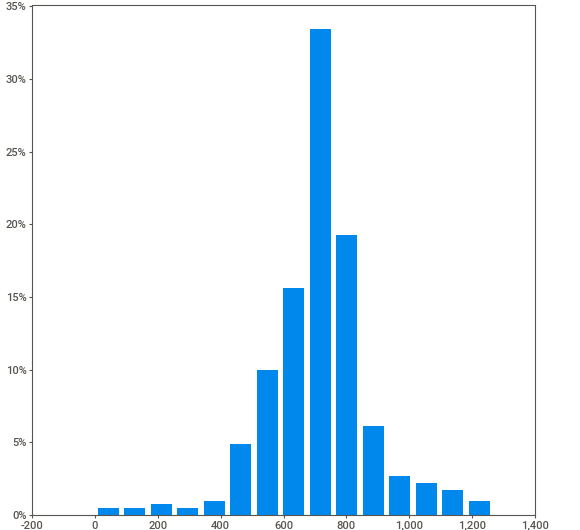
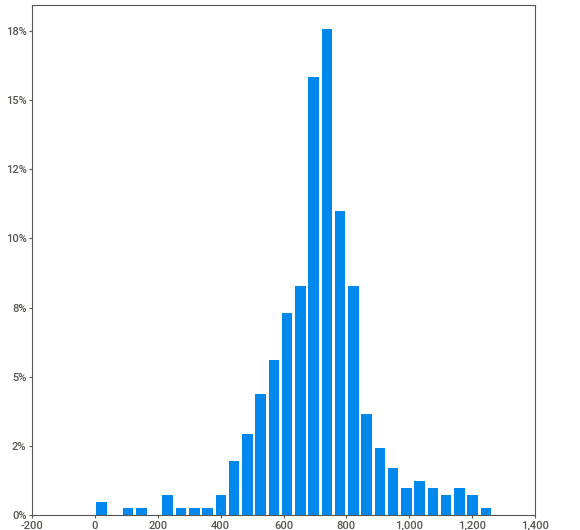
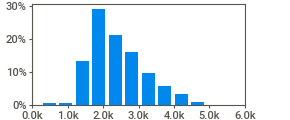
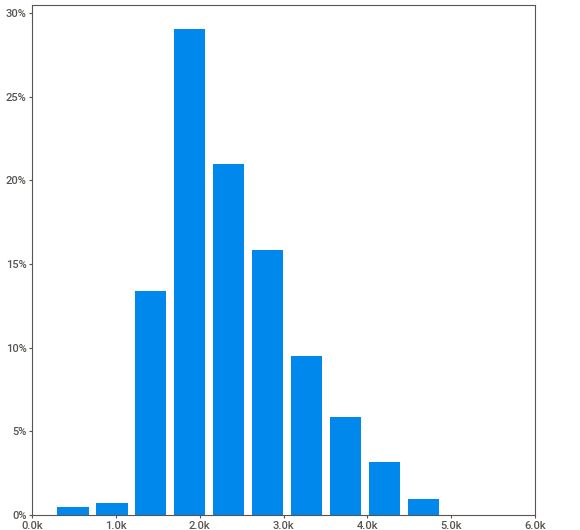
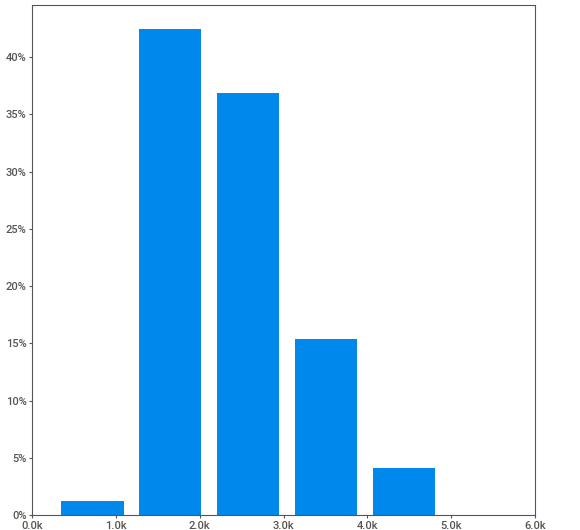
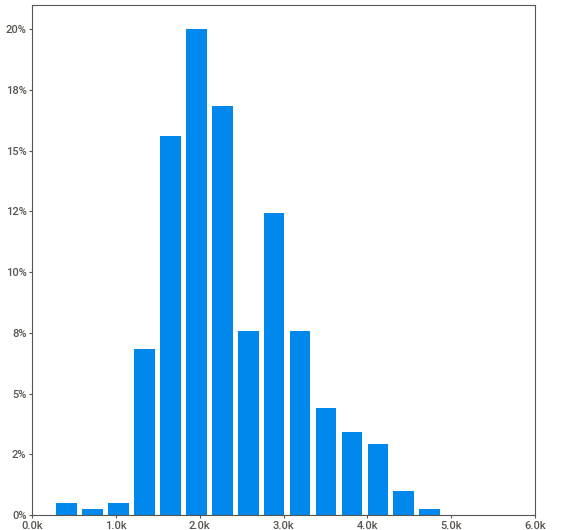
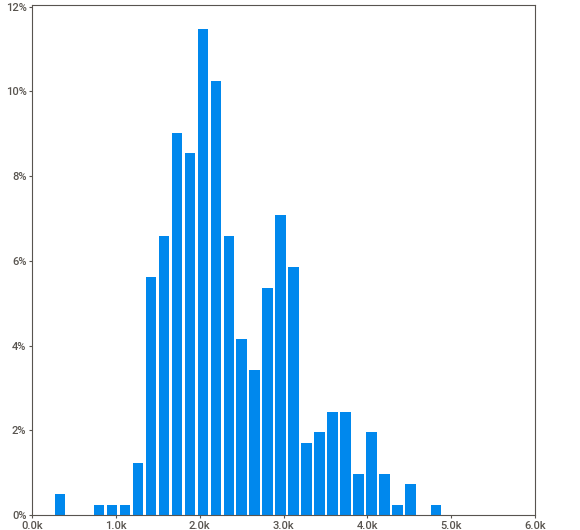
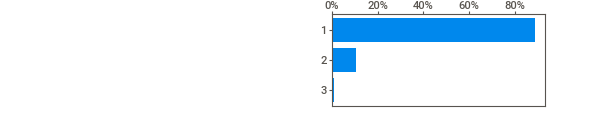
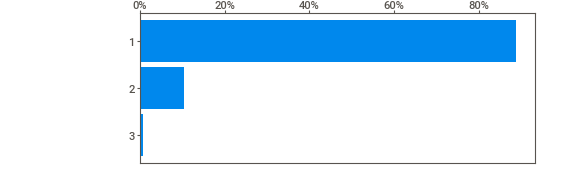
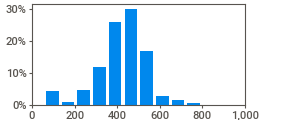
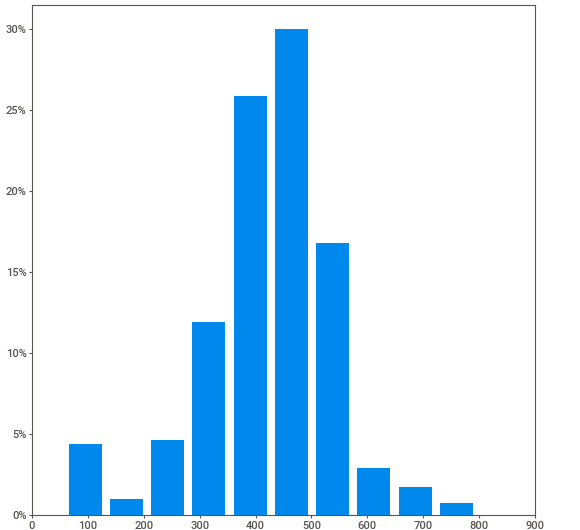
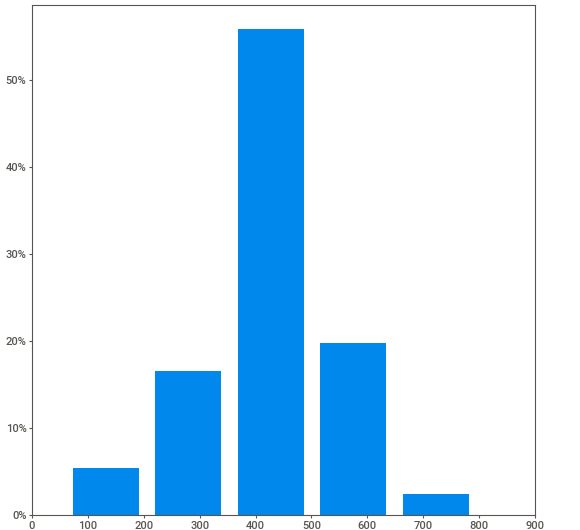
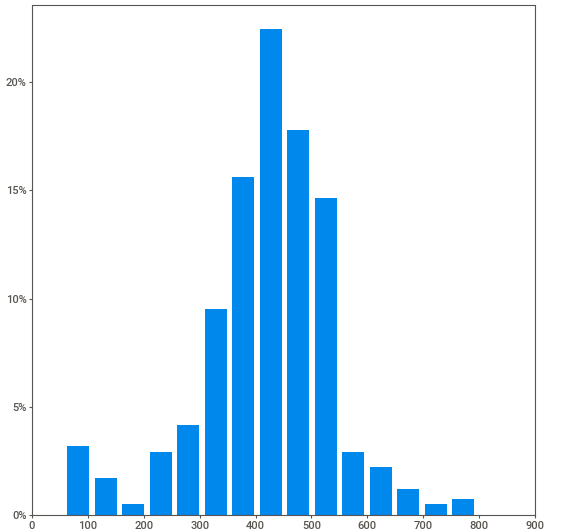
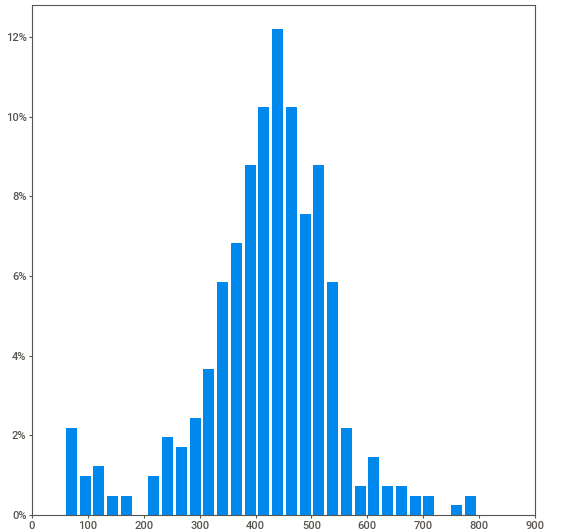
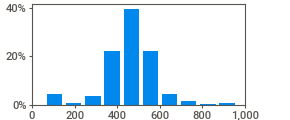
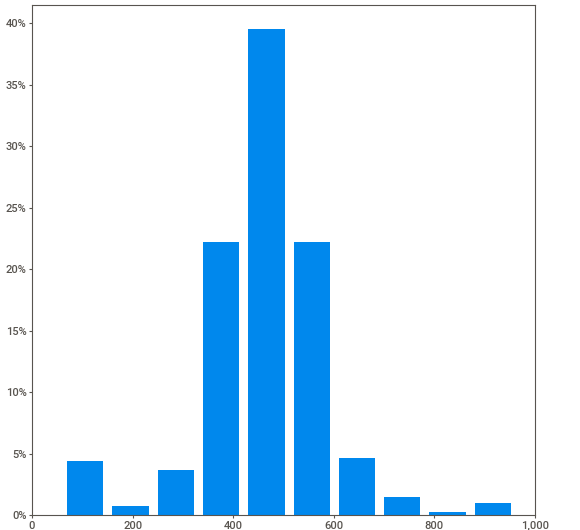
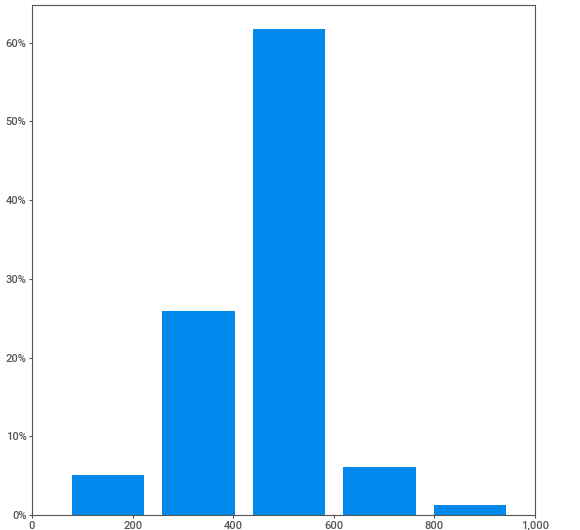
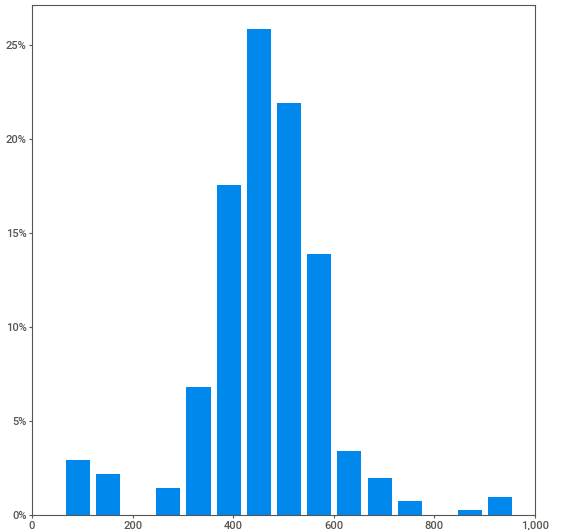
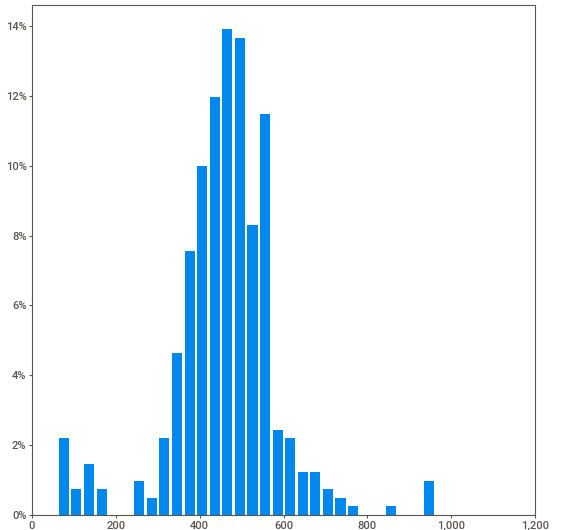
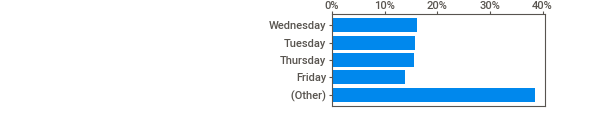
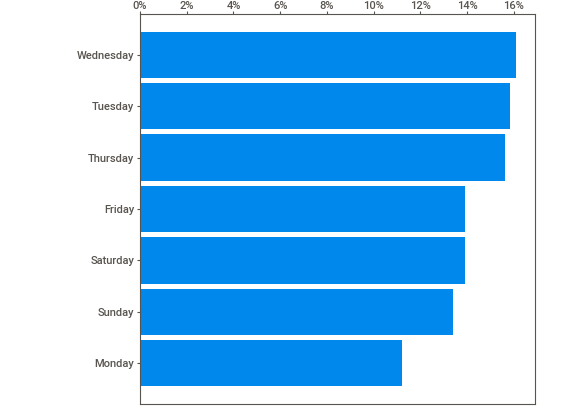
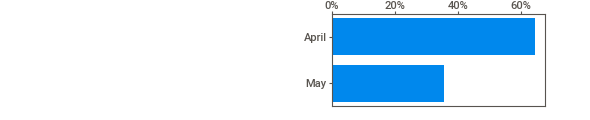
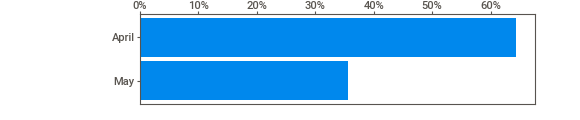
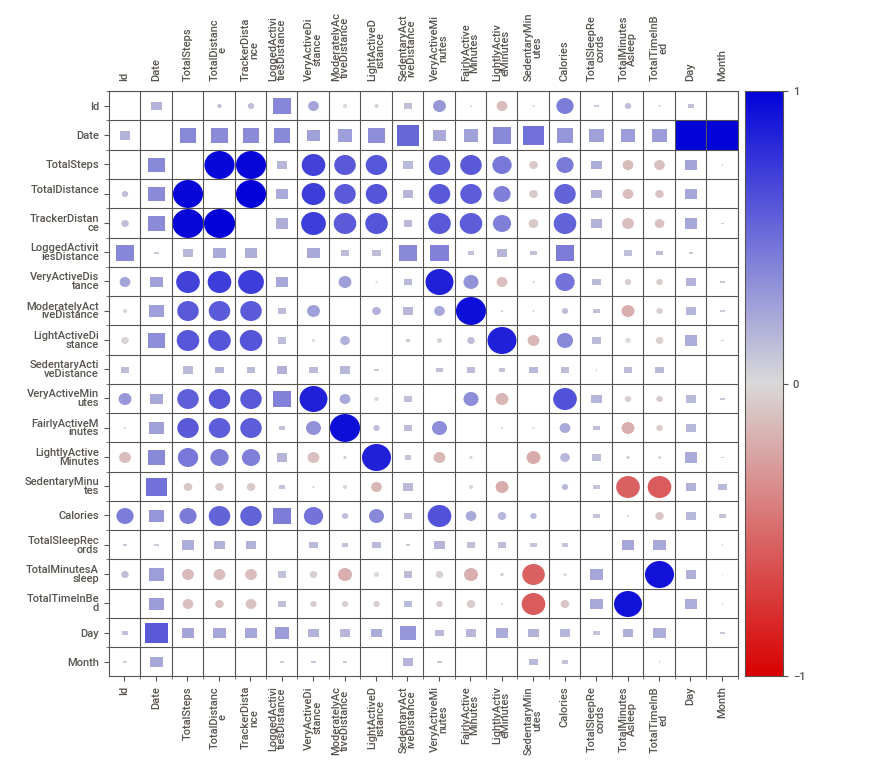
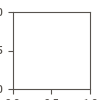

In [39]:
IPython.display.HTML('daily_merged.html')

In [40]:
#continue from line 48

Now let's remove univariate outliers from the df. First, we will create a new dataframe containing the non-numeric columns (daily_merged_nonNumVars). Second, we will identify and remove univariate outliers from the numeric columns (daily_merged_VarsOnly). Finally, we will rejoin the non-numeric and numeric dfs (daily_remerged).

In [41]:
daily_merged.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day,Month
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,Tuesday,April
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,Wednesday,April
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,Friday,April
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,Saturday,April
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,Sunday,April


In [42]:
#seperate non-numerice and numeric
daily_merged_nonNumVars = daily_merged[["Id", "Date", "Day", "Month"]]
daily_merged_nonNumVars.head()

,Id,Date,Day,Month
0,1503960366,2016-04-12,Tuesday,April
1,1503960366,2016-04-13,Wednesday,April
2,1503960366,2016-04-15,Friday,April
3,1503960366,2016-04-16,Saturday,April
4,1503960366,2016-04-17,Sunday,April


In [43]:
#remove reduntant columns - TotalSleepRecords
del daily_merged["TotalSleepRecords"]
daily_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   Date                      410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

In [44]:
#new df which has only numeric columns
daily_merged_VarsOnly = pd.DataFrame(daily_merged.iloc[:, 2:17])
daily_merged_VarsOnly.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,327,346
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,384,407
2,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,412,442
3,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,340,367
4,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,700,712


In [45]:
daily_merged_VarsOnly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 412
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalSteps                410 non-null    int64  
 1   TotalDistance             410 non-null    float64
 2   TrackerDistance           410 non-null    float64
 3   LoggedActivitiesDistance  410 non-null    float64
 4   VeryActiveDistance        410 non-null    float64
 5   ModeratelyActiveDistance  410 non-null    float64
 6   LightActiveDistance       410 non-null    float64
 7   SedentaryActiveDistance   410 non-null    float64
 8   VeryActiveMinutes         410 non-null    int64  
 9   FairlyActiveMinutes       410 non-null    int64  
 10  LightlyActiveMinutes      410 non-null    int64  
 11  SedentaryMinutes          410 non-null    int64  
 12  Calories                  410 non-null    int64  
 13  TotalMinutesAsleep        410 non-null    int64  
 14  TotalTimeI

In [46]:
#code to find percentage of missing values in a dataframe
percent_missing = daily_merged_VarsOnly.isnull().sum().sum()*100 / (len(daily_merged_VarsOnly) * len(daily_merged_VarsOnly.columns))
percent_missing

0.0

In [47]:
for i in daily_merged_VarsOnly.columns:

    # calculate the interquartile range
    s = daily_merged_VarsOnly[i]
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    iqr_lower = q1 - 1.5 * iqr
    iqr_upper = q3 + 1.5 * iqr
    outliers = dict(s[(s < iqr_lower) | (s > iqr_upper)])
    print(daily_merged_VarsOnly[i].describe())
    print('Outliers:', outliers)
    print('5th percentile:', daily_merged_VarsOnly[i].quantile(0.05))       # find the variable's 5th percentile
    print('95th percentile:', daily_merged_VarsOnly[i].quantile(0.95))      # find the variable's 95th percentile

    # remove outliers
    daily_merged_VarsOnly[i] = np.where(daily_merged_VarsOnly[i] > iqr_upper, daily_merged_VarsOnly[i].quantile(0.5), daily_merged_VarsOnly[i])   # where any variable value is greater than the lower IQR, replace with median
    daily_merged_VarsOnly[i] = np.where(daily_merged_VarsOnly[i] < iqr_lower, daily_merged_VarsOnly[i].quantile(0.5), daily_merged_VarsOnly[i])   # where any variable value is less than the lower IQR, replace with median
    print(daily_merged_VarsOnly[i].describe())
    outliers_updated = dict(s[(s < iqr_lower) | (s > iqr_upper)])
    print('Outliers after removal:', outliers_updated)
    print('\n')            # print a blank space after each column to provide visual separation

count      410.000000
mean      8514.909756
std       4157.375584
min         17.000000
25%       5188.750000
50%       8913.000000
75%      11370.250000
max      22770.000000
Name: TotalSteps, dtype: float64
Outliers: {162: 22770, 364: 22359}
5th percentile: 1919.3000000000004
95th percentile: 15105.75
count      410.000000
mean      8448.317073
std       4039.140708
min         17.000000
25%       5188.750000
50%       8912.000000
75%      11203.500000
max      20031.000000
Name: TotalSteps, dtype: float64
Outliers after removal: {162: 22770, 364: 22359}


count    410.000000
mean       6.012390
std        3.043946
min        0.010000
25%        3.592500
50%        6.270000
75%        8.005000
max       17.540001
Name: TotalDistance, dtype: float64
Outliers: {162: 17.5400009155273, 290: 15.0100002288818, 364: 17.1900005340576, 365: 15.6700000762939}
5th percentile: 1.2965000092983274
95th percentile: 10.76500024795533
count    410.000000
mean       5.914024
std        2.863598
min   

In [48]:
daily_merged_VarsOnly.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,327.0,346.0
1,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,384.0,407.0
2,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,412.0,442.0
3,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,340.0,367.0
4,9705.0,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0,432.5,463.0


In [49]:
daily_remerged = pd.concat([daily_merged_nonNumVars, daily_merged_VarsOnly], axis = 1)
daily_remerged.head()

,Id,Date,Day,Month,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,Tuesday,April,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,327.0,346.0
1,1503960366,2016-04-13,Wednesday,April,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,384.0,407.0
2,1503960366,2016-04-15,Friday,April,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,412.0,442.0
3,1503960366,2016-04-16,Saturday,April,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,340.0,367.0
4,1503960366,2016-04-17,Sunday,April,9705.0,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0,432.5,463.0


In [50]:
# create a list of our conditions
conditions = [
    (daily_remerged['Day'] == 'Monday'),
    (daily_remerged['Day'] == 'Tuesday'),
    (daily_remerged['Day'] == 'Wednesday'),
    (daily_remerged['Day'] == 'Thursday'),
    (daily_remerged['Day'] == 'Friday'),
    (daily_remerged['Day'] == 'Saturday'),
    (daily_remerged['Day'] == 'Sunday'),
    ]

# create a list of the values we want to assign for each condition
values = ['Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekday', 'Weekend', 'Weekend']

# create a new column and use np.select to assign values to it using our lists as arguments
daily_remerged['DayofWeek'] = np.select(conditions, values)

# display updated DataFrame
daily_remerged.head()

,Id,Date,Day,Month,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed,DayofWeek
0,1503960366,2016-04-12,Tuesday,April,13162.0,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25.0,13.0,328.0,728.0,1985.0,327.0,346.0,Weekday
1,1503960366,2016-04-13,Wednesday,April,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0,384.0,407.0,Weekday
2,1503960366,2016-04-15,Friday,April,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0,412.0,442.0,Weekday
3,1503960366,2016-04-16,Saturday,April,12669.0,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36.0,10.0,221.0,773.0,1863.0,340.0,367.0,Weekend
4,1503960366,2016-04-17,Sunday,April,9705.0,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38.0,20.0,164.0,539.0,1728.0,432.5,463.0,Weekend


In [51]:
#export dataframe
#daily_remerged.to_excel('daily_remerged.xlsx', index=False)

# Analyse

In [52]:
dailyActivity["Id"].nunique()

33

In [53]:
dailySleep["Id"].nunique()

24

Note that there are 24 unique Ids in the dailySleep df, while there are 33 unique Ids in the dailyActivity df. Therefore, nine people who logged their daily activity did not log their sleep using their wearable device. This means approximately 27% of the users in this dataset did not wear their device to bed to track their sleep.

In [80]:
#the numbers and percentages of people who use the device to track their activity and sleep
numSleepIds = dailySleep.Id.nunique()
numActivityIds = dailyActivity.Id.nunique()
numNonSleepIds = numActivityIds - numSleepIds
print('Number of Users with Sleep Data:', numSleepIds)
print('Number of Users with Activity Data:', numActivityIds)
print('Number of Users without Sleep Data:', numNonSleepIds)

Number of Users with Sleep Data: 24
Number of Users with Activity Data: 33
Number of Users without Sleep Data: 9


In [81]:
percentNonSleepData = (numNonSleepIds / numActivityIds) * 100
print('Percentage of Users Who Do Not Wear Device to Bed:', percentNonSleepData)

percentSleepData = 100 - ((numNonSleepIds / numActivityIds) * 100)
print('Percentage of Users Who Do Wear Device to Bed:', percentSleepData)

Percentage of Users Who Do Not Wear Device to Bed: 27.27272727272727
Percentage of Users Who Do Wear Device to Bed: 72.72727272727273


In [83]:
daily_remerged.groupby(['Id', 'Day']).mean()

TotalSteps  TotalDistance  TrackerDistance  \
Id         Day                                                       
1503960366 Friday     11034.000000       7.153333         7.153333   
           Monday     14034.666667       9.076667         9.076667   
           Saturday   13426.250000       8.540000         8.540000   
           Sunday     10101.500000       6.570000         6.570000   
           Thursday   12347.666667       7.923333         7.923333   
...                            ...            ...              ...   
8792009665 Saturday    6209.500000       3.975000         3.975000   
           Sunday      1619.000000       1.040000         1.040000   
           Thursday    3688.000000       2.360000         2.360000   
           Tuesday     2492.500000       1.595000         1.595000   
           Wednesday   2127.000000       1.360000         1.360000   

                      LoggedActivitiesDistance  VeryActiveDistance  \
Id         Day                                                       
1503960366 Friday                          0.0            1.723333   
           Monday                          0.0            3.983333   
           Saturday                        0.0            2.885000   
           Sunday                          0.0            2.982500   
           Thursday                        0.0            2.600000   
...                                        ...                 ...   
8792009665 Saturday                        0.0            0.245000   
           Sunday                          0.0            0.000000   
           Thursday                        0.0            0.000000   
           Tuesday                         0.0            0.000000   
           Wednesday                       0.0            0.000000   

                      ModeratelyActiveDistance  LightActiveDistance  \
Id         Day                                                        
1503960366 Friday                     0.670000             4.740000   
           Monday                     0.556667             4.533333   
           Saturday                   1.205000             4.450000   
           Sunday                     0.727500             2.860000   
           Thursday                   0.863333             4.440000   
...                                        ...                  ...   
8792009665 Saturday                   0.400000             3.330000   
           Sunday                     0.000000             1.040000   
           Thursday                   0.000000             2.360000   
           Tuesday                    0.000000             1.595000   
           Wednesday                  0.070000             1.292500   

                      SedentaryActiveDistance  VeryActiveMinutes  \
Id         Day                                                     
1503960366 Friday                         0.0          23.000000   
           Monday                         0.0          53.333333   
           Saturday                       0.0          41.500000   
           Sunday                         0.0          38.500000   
           Thursday                       0.0          37.333333   
...                                       ...                ...   
8792009665 Saturday                       0.0           9.000000   
           Sunday                         0.0           0.000000   
           Thursday                       0.0           0.000000   
           Tuesday                        0.0           0.000000   
           Wednesday                      0.0           0.000000   

                      FairlyActiveMinutes  LightlyActiveMinutes  \
Id         Day                                                    
1503960366 Friday               17.333333            247.000000   
           Monday               13.333333            233.000000   
           Saturday             27.750000            218.750000   
           Sunday               17.000000            212.7

In [85]:
daily_remerged.groupby('Day').mean()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
Day,,,,,,,,,,,,,,,,
Friday,4.922502e+09,7901.403509,5.511930,5.511930,0.0,1.134035,0.588070,3.779474,0.0,15.929825,14.578947,218.245614,733.807018,2329.649123,422.785088,460.052632
Monday,4.985778e+09,9273.217391,6.540870,6.535870,0.0,1.734348,0.580652,4.013913,0.0,23.739130,14.391304,222.369565,718.173913,2431.978261,426.891304,462.978261
Saturday,4.960006e+09,9392.122807,6.461579,6.461579,0.0,1.103509,0.630175,3.881404,0.0,15.070175,17.666667,228.017544,659.122807,2506.894737,434.065789,468.105263
Sunday,4.844438e+09,7297.854545,5.184727,5.184727,0.0,0.694364,0.398909,3.289273,0.0,9.872727,10.690909,200.036364,651.836364,2191.436364,477.522727,521.381818
Thursday,5.033208e+09,8183.515625,5.636875,5.608281,0.0,1.152031,0.567187,3.695938,0.0,14.390625,13.671875,190.906250,728.718750,2264.593750,421.671875,456.656250
Tuesday,4.911466e+09,9182.692308,6.430000,6.430000,0.0,1.512462,0.681538,3.886615,0.0,24.569231,15.400000,212.400000,729.492308,2496.200000,404.719231,443.753846
Wednesday,5.264718e+09,8022.863636,5.719849,5.719849,0.0,1.114242,0.581515,3.652121,0.0,19.712121,14.136364,204.181818,716.333333,2378.242424,438.928030,470.030303


# Visualisation

Tableau visualisation - 
https://public.tableau.com/app/profile/cassie.skipper/viz/GoogleDataAnalyticsCapstoneFitBitUserData/DashboardDailyUserData_1

In [86]:
#python visualisations-
# import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

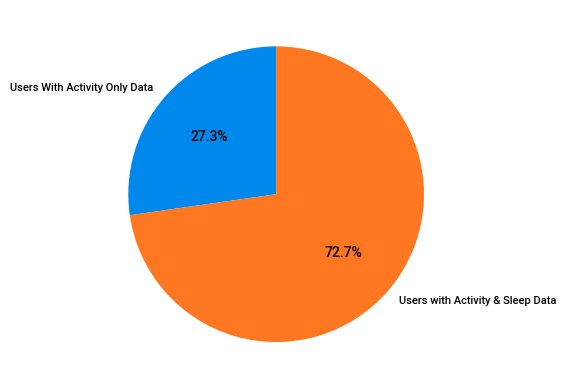

In [87]:
data = [numNonSleepIds, numSleepIds]
mylabels = ['Users With Activity Only Data', 'Users with Activity & Sleep Data']

plt.pie(data, labels = mylabels, autopct='%1.1f%%', explode=[0,0], startangle=90)
plt.show() 

Text(0.5, 1.0, 'Calories Expended Daily by FitBit Users')

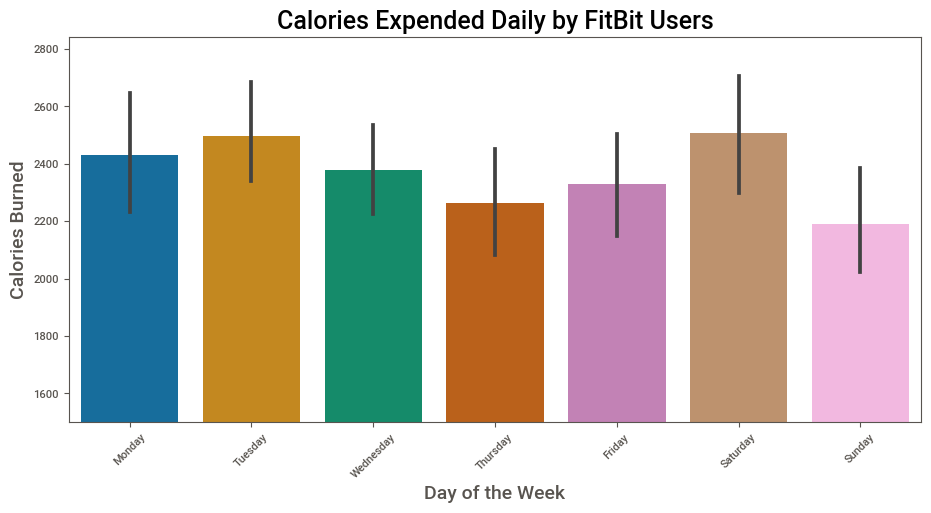

In [88]:
#calories burned by the user throughout the week
plt.figure(figsize=(11, 5))            # set figure size
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']    # order days of the week
sns.barplot(data=daily_remerged, x="Day", y ="Calories", 
                               order=order_list, palette='colorblind')

plt.ylim(1500,)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Calories Burned', fontsize=14)
plt.title('Calories Expended Daily by FitBit Users', fontsize=18)

Text(0.5, 1.0, 'Total Daily Distance of FitBit Users')

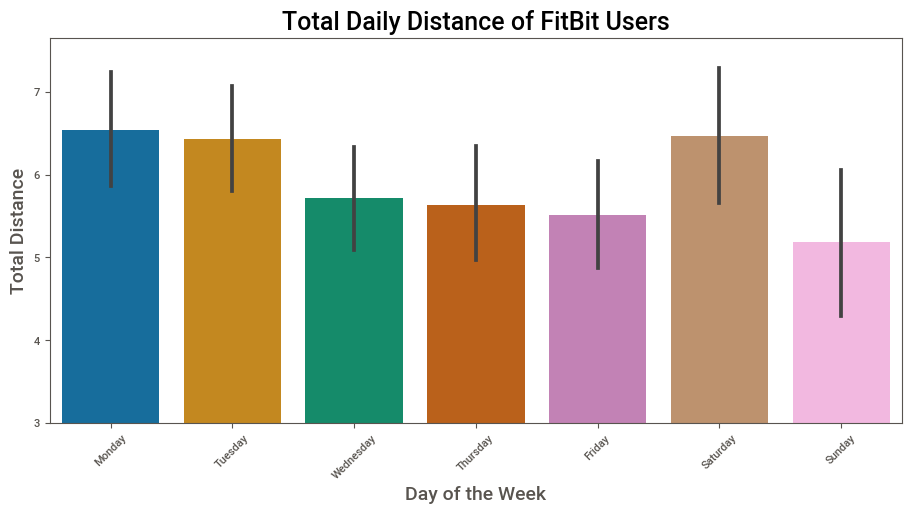

In [89]:
#total distance covered by the user throughout the week
plt.figure(figsize=(11, 5))
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=daily_remerged, x="Day", y ="TotalDistance", 
                               order=order_list, palette='colorblind')

plt.ylim(3,)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Total Distance', fontsize=14)
plt.title('Total Daily Distance of FitBit Users', fontsize=18)

Text(0.5, 1.0, 'Total Daily Steps of FitBit Users')

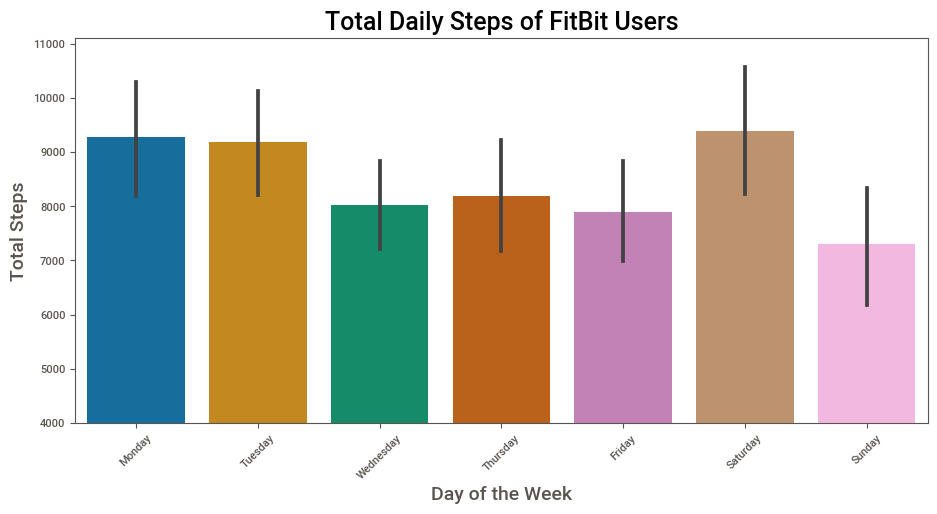

In [90]:
#total steps covered throughout the week
plt.figure(figsize=(11, 5))
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=daily_remerged, x="Day", y ="TotalSteps", 
                               order=order_list, palette='colorblind')

plt.ylim(4000,)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Total Steps', fontsize=14)
plt.title('Total Daily Steps of FitBit Users', fontsize=18)

Text(0.5, 1.0, 'Total Minutes Asleep by Weekday for FitBit Users')

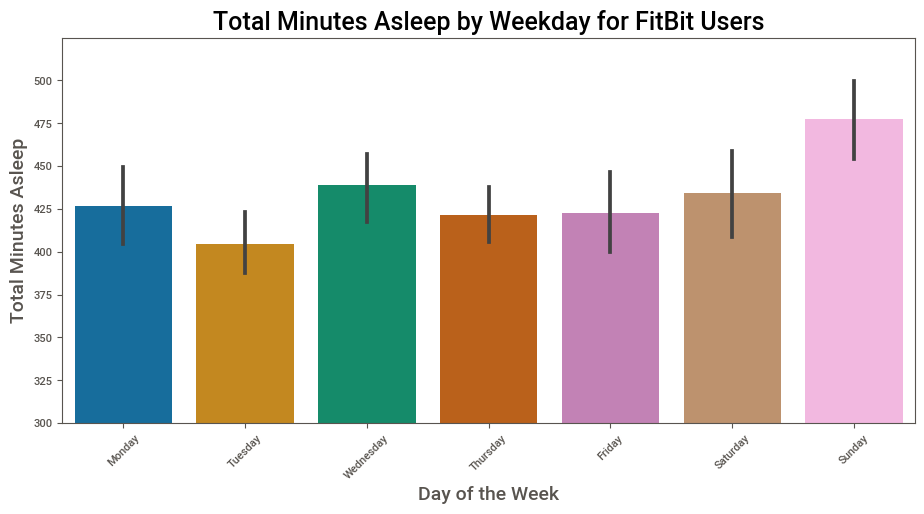

In [91]:
#total minutes asleep throughout the week
plt.figure(figsize=(11, 5))
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(data=daily_remerged, x="Day", y ="TotalMinutesAsleep", 
                               order=order_list, palette='colorblind')

plt.ylim(300,)
plt.xlabel('Day of the Week', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Total Minutes Asleep', fontsize=14)
plt.title('Total Minutes Asleep by Weekday for FitBit Users', fontsize=18)

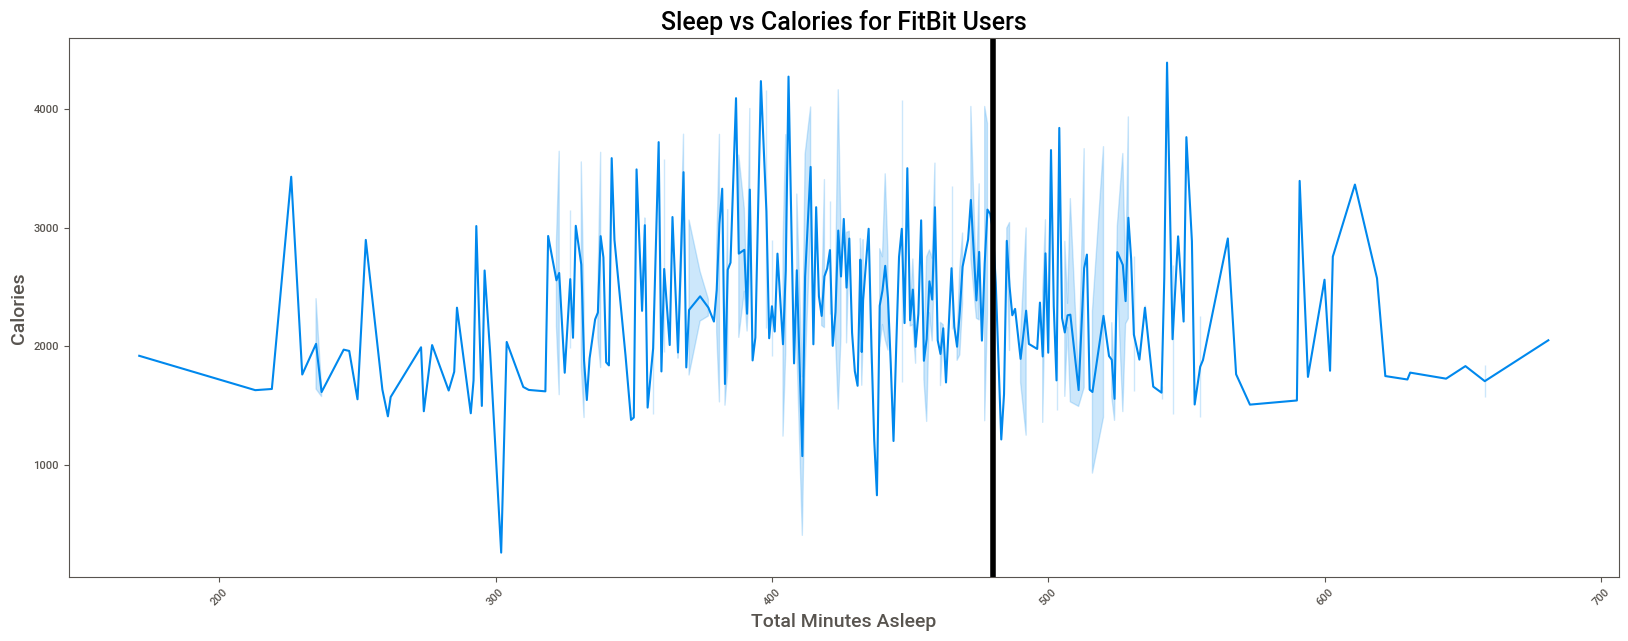

In [92]:
#total mins asleep vs calories
plt.figure(figsize=(20, 7))
sns.lineplot(data=daily_remerged, x="TotalMinutesAsleep", y ="Calories")

plt.xlabel('Total Minutes Asleep', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Calories', fontsize=14)
plt.title('Sleep vs Calories for FitBit Users', fontsize=18)
plt.axvline(480, linewidth=4, color='black')           # 480 minutes = 8 hours of sleep

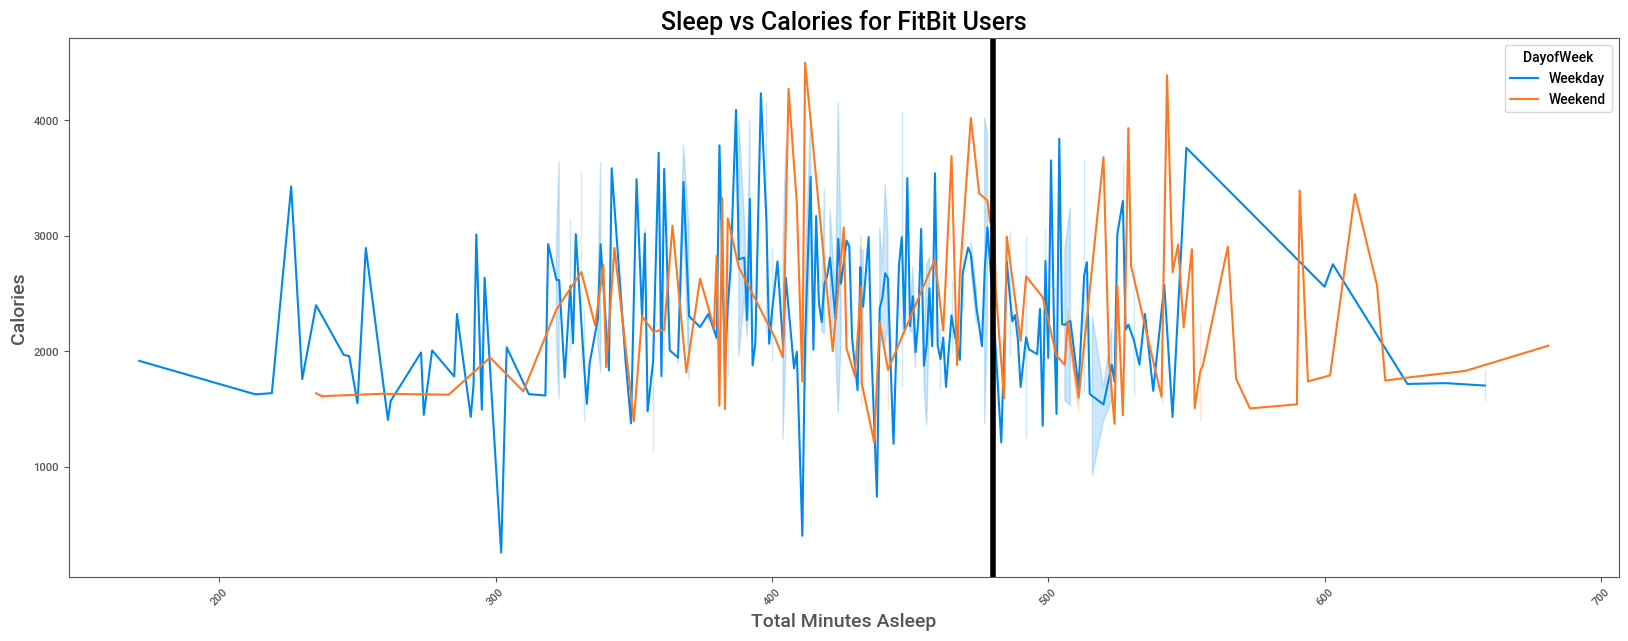

In [93]:
#calories vs time asleep throughout the week
plt.figure(figsize=(20, 7))
sns.lineplot(data=daily_remerged, x="TotalMinutesAsleep", y ="Calories", hue='DayofWeek')

plt.xlabel('Total Minutes Asleep', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Calories', fontsize=14)
plt.title('Sleep vs Calories for FitBit Users', fontsize=18)
plt.axvline(480, linewidth=4, color='black')

C:\Users\Varsha Rao\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Sleep vs Calories for FitBit Users')

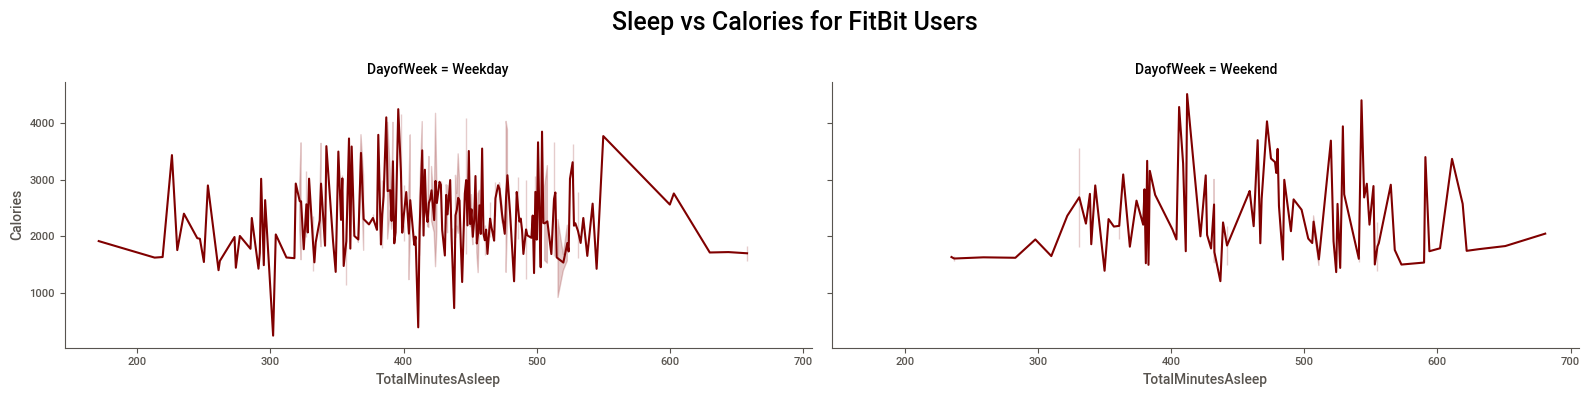

In [94]:
#calories vs time asleep seperated by weekday and weekends
g = sns.FacetGrid(daily_remerged, col="DayofWeek", size=4, aspect=2)
g.map(sns.lineplot, "TotalMinutesAsleep", "Calories", color='maroon')
g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle('Sleep vs Calories for FitBit Users', fontsize=18)

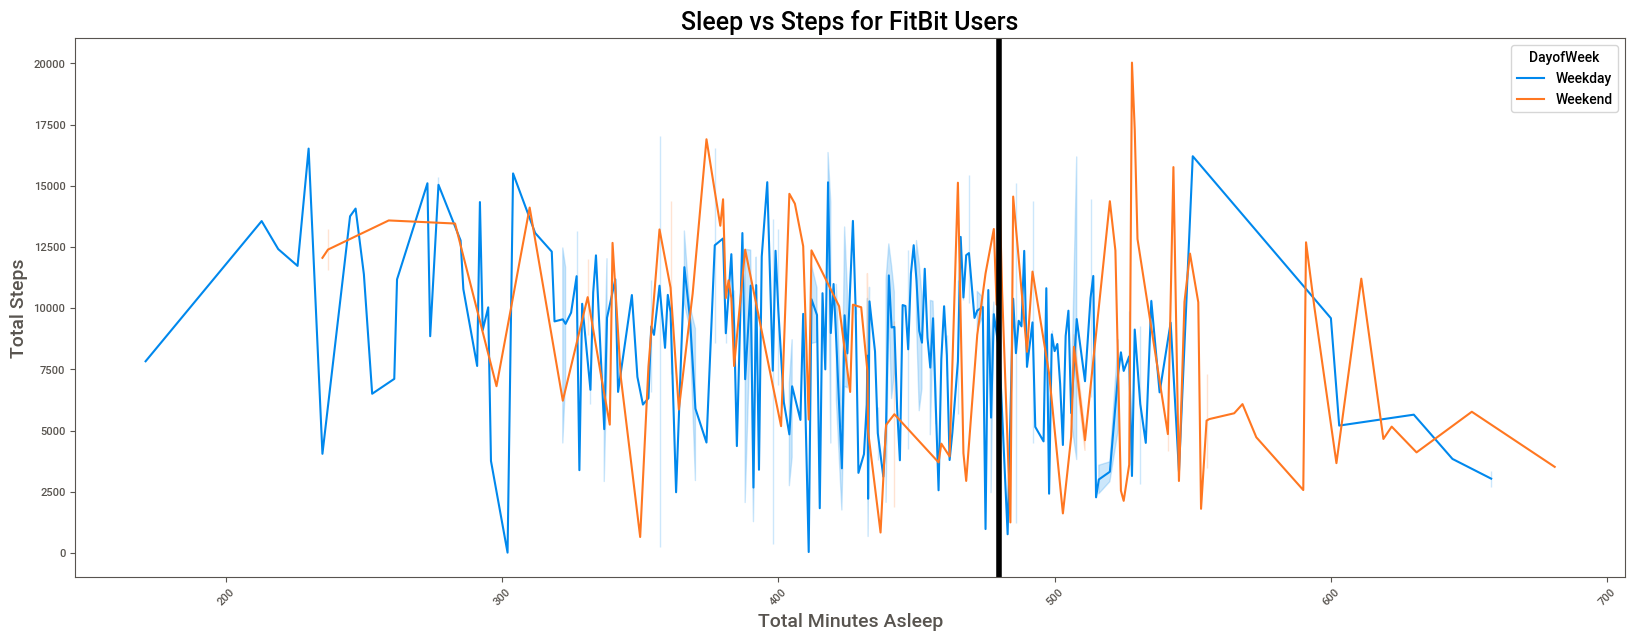

In [95]:
#total time asleep vs total no. steps throughout the week
plt.figure(figsize=(20, 7))
sns.lineplot(data=daily_remerged, x="TotalMinutesAsleep", y ="TotalSteps", hue='DayofWeek')

plt.xlabel('Total Minutes Asleep', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Total Steps', fontsize=14)
plt.title('Sleep vs Steps for FitBit Users', fontsize=18)
plt.axvline(480, linewidth=4, color='black')

C:\Users\Varsha Rao\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Sleep vs Steps for FitBit Users')

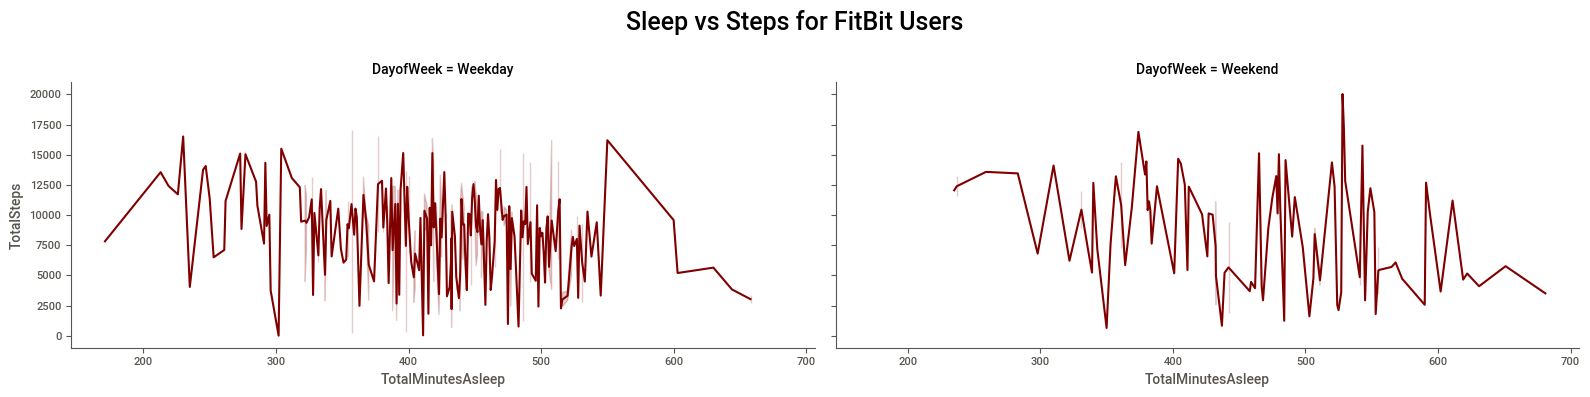

In [96]:
#total time asleep ve no. of steps seperated by weekdays and weekends
g = sns.FacetGrid(daily_remerged, col="DayofWeek", size=4, aspect=2)
g.map(sns.lineplot, "TotalMinutesAsleep", "TotalSteps", color='maroon')
g.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
g.fig.suptitle('Sleep vs Steps for FitBit Users', fontsize=18)

Text(0.5, 1.0, 'Calories Expended Over Time by FitBit Users')

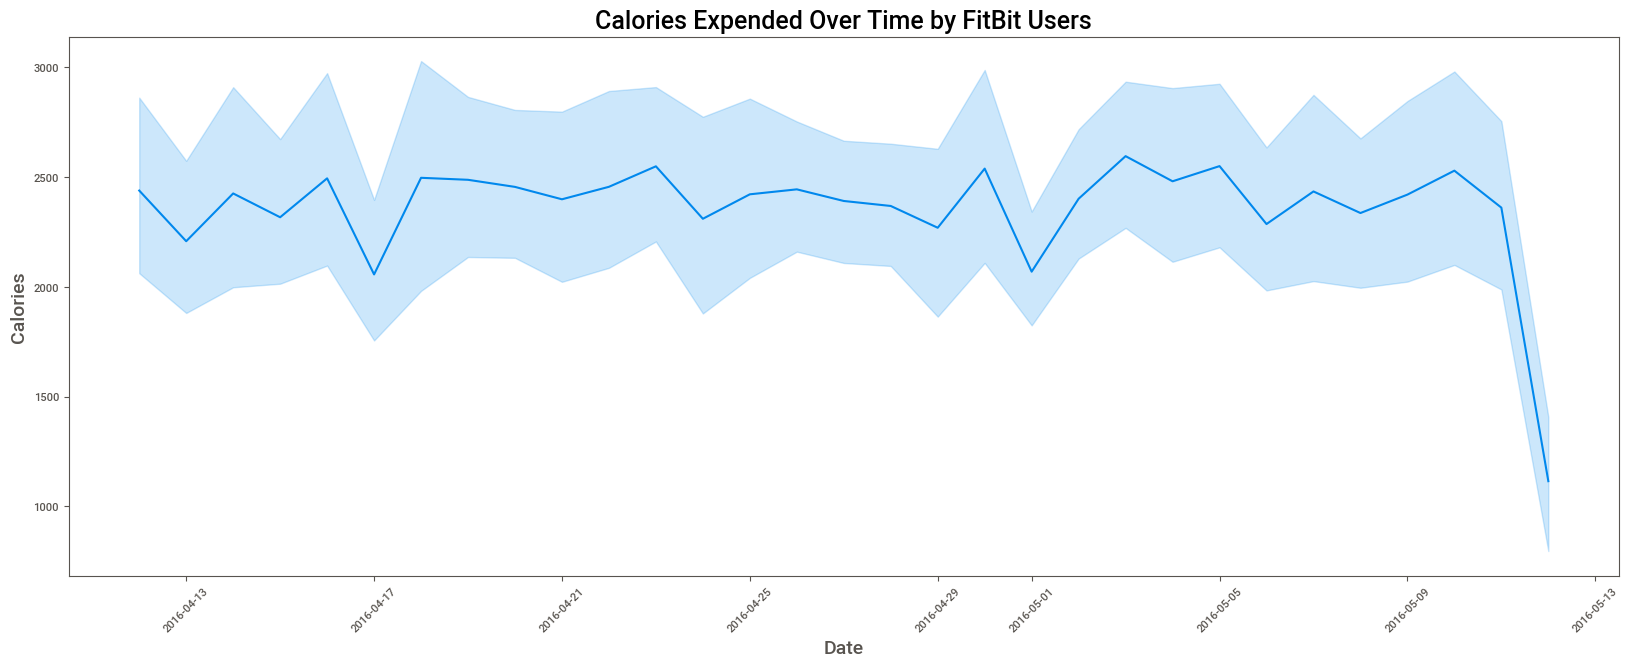

In [97]:
#date vs calories burnt by user
plt.figure(figsize=(20, 7))
order_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.lineplot(data=daily_remerged, x="Date", y ="Calories")

plt.xlabel('Date', fontsize=14)
plt.xticks(rotation = 45)
plt.ylabel('Calories', fontsize=14)
plt.title('Calories Expended Over Time by FitBit Users', fontsize=18)
#plt.axvline(480, linewidth=4, color='black')

# Insights derived

FitBit users are more likely to utilize their wearable device for tracking their activity than sleep. Only 72.7% of the users in this dataset wore their devices to bed, meaning 27.3% of FitBit users are not utilizing the opportunity to track and optimize their sleep. Bellabeat could alter their marketing strategy to incentivize users to wear their Leaf product to bed by informing users of the benefits of tracking their sleep (e.g., knowing your sleep habits could help you to improve them).

Users exerted the most energy at the beginning of the work week and on Saturdays. Bellabeat could apply this to their marketing strategy by including additional motivational messages Wednesday-Friday. These motivational messages could be displayed in the app or on the Leaf/Time/Spring devices. Further, Bellabeat could slightly increase reminders to drink water when the Leaf device notices a significant increase in activity (Monday, Tuesday, Saturday) for proper hydration or a lull in activity (Wednesday-Friday) on weekdays to increase energy.

Users exerted the least energy on Sundays. Encouraging users to expend more energy on Sundays may be counterintuitive to the customer's needs. Bellabeat could lean in to their customer's natural desire to relax on Sundays by launching a new relaxation module or self care tip every Sunday. This could further endear customers to the Bellabeat platform and may increase usage of Bellabeat products.

It should be noted that the current FitBit dataset does not include demographics. Because Bellabeat's target audience is women, it would be advantageous to analyze a similar dataset that included demographics so it could be filtered for women to improve Bellabeat's marketing strategy.